
# Cybersecurity Threat Classification Using Machine Learning (CIC-IDS2017)


### Use the CICIDS2017 dataset (available at https://www.unb.ca/cic/datasets/ids.html)


# Steps to Follow

Data Preprocessing: Clean, normalize, and handle missing values.

Feature Selection: Identify and extract relevant features.
## New Section
Model Selection & Training: Train at least two ML models (e.g., Random Forest, SVM, or Neural Networks) for classification.
## New Section
Evaluation: Compare models using accuracy, precision, recall, and F1-score.
## New Section
Visualization: Use graphs (confusion matrix, feature importance, etc.) to present insights.

# Implementation Constraints

Use Python (preferred: Scikit-learn, TensorFlow/PyTorch, Pandas, Matplotlib).

Code must be well-documented and structured.

In [ ]:
!pwd

/content


In [ ]:

data_path = "/content/archive (1).zip"

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
sns.set(style='darkgrid')
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

data_path = "/content/archive (1).zip"

In [ ]:
import pandas as pd
import zipfile

data_path = "/content/archive (1).zip"

# Extract the desired CSV file from the zip archive
with zipfile.ZipFile(data_path, 'r') as zip_ref:
    # Replace 'your_data_file.csv' with the actual filename you want to read
    csv_file_path = 'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'
    with zip_ref.open(csv_file_path) as file:
        df = pd.read_csv(file)

df.shape # Now you can access the shape of the DataFrame

(225745, 79)

In [ ]:
csv_file_path = "/content/archive (1).zip"

In [ ]:
csv_file_path1 = "/content/archive (1).zip/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
csv_file_path2 = "/content/archive (1).zip/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv"
csv_file_path3 = "/content/archive (1).zip/Friday-WorkingHours-Morning.pcap_ISCX.csv"
csv_file_path4 = "/content/archive (1).zip/Monday-WorkingHours.pcap_ISCX.csv"
csv_file_path5 = "/content/archive (1).zip/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv"
csv_file_path6 = "/content/archive (1).zip/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv"
csv_file_path7 = "/content/archive (1).zip/Tuesday-WorkingHours.pcap_ISCX.csv"
csv_file_path8 = "/content/archive (1).zip/Wednesday-workingHours.pcap_ISCX.csv"

In [ ]:
csv_file_path_list = [csv_file_path1, csv_file_path2, csv_file_path3, csv_file_path4, csv_file_path5, csv_file_path6, csv_file_path7, csv_file_path8]

print('Data dimensions: ')
for i, data in enumerate(csv_file_path_list, start = 1):
  rows, cols = df.shape
  print(f'Data{i} -> {rows} rows, {cols} columns')



Data dimensions: 
Data1 -> 225745 rows, 79 columns
Data2 -> 225745 rows, 79 columns
Data3 -> 225745 rows, 79 columns
Data4 -> 225745 rows, 79 columns
Data5 -> 225745 rows, 79 columns
Data6 -> 225745 rows, 79 columns
Data7 -> 225745 rows, 79 columns
Data8 -> 225745 rows, 79 columns


In [ ]:
import pandas as pd
import zipfile

data_path = "/content/archive (1).zip"
csv_file_path_list = [
    "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv",
    "Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv",
    "Friday-WorkingHours-Morning.pcap_ISCX.csv",
    "Monday-WorkingHours.pcap_ISCX.csv",
    "Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv",
    "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv",
    "Tuesday-WorkingHours.pcap_ISCX.csv",
    "Wednesday-workingHours.pcap_ISCX.csv",
]

# Create an empty list to store the dataframes
df_list = []

# Iterate through the list of CSV file paths
for csv_file_path in csv_file_path_list:
    # Extract and read each CSV file from the zip archive
    with zipfile.ZipFile(data_path, 'r') as zip_ref:
        with zip_ref.open(csv_file_path) as file:
            df = pd.read_csv(file)
            # Append the dataframe to the list
            df_list.append(df)

# Concatenate all dataframes in the list
data = pd.concat(df_list)

# Get the shape of the concatenated dataframe
rows, cols = data.shape

print('New dimension:')
print(f'Number of rows: {rows}')
print(f'Number of columns: {cols}')
print(f'Total cells: {rows * cols}')

New dimension:
Number of rows: 2830743
Number of columns: 79
Total cells: 223628697


In [ ]:
# Deleting dataframes after concating to save memory
for d in df_list: del d # Changed data_list to df_list

In [ ]:
# Renaming the columns by removing leading/trailing whitespace
col_names = {col: col.strip() for col in data.columns}
data.rename(columns = col_names, inplace = True)

In [ ]:

data.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [ ]:


data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2830743 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  Flow I

In [ ]:
pd.options.display.max_rows = 80

print('Overview of Columns:')
data.describe().transpose()

Overview of Columns:


count          mean           std  \
Destination Port             2830743.0  8.071483e+03  1.828363e+04   
Flow Duration                2830743.0  1.478566e+07  3.365374e+07   
Total Fwd Packets            2830743.0  9.361160e+00  7.496728e+02   
Total Backward Packets       2830743.0  1.039377e+01  9.973883e+02   
Total Length of Fwd Packets  2830743.0  5.493024e+02  9.993589e+03   
Total Length of Bwd Packets  2830743.0  1.616264e+04  2.263088e+06   
Fwd Packet Length Max        2830743.0  2.075999e+02  7.171848e+02   
Fwd Packet Length Min        2830743.0  1.871366e+01  6.033935e+01   
Fwd Packet Length Mean       2830743.0  5.820194e+01  1.860912e+02   
Fwd Packet Length Std        2830743.0  6.891013e+01  2.811871e+02   
Bwd Packet Length Max        2830743.0  8.708495e+02  1.946367e+03   
Bwd Packet Length Min        2830743.0  4.104958e+01  6.886260e+01   
Bwd Packet Length Mean       2830743.0  3.059493e+02  6.052568e+02   
Bwd Packet Length Std        2830743.0  3.353257e+02  8.396932e+02   
Flow Bytes/s                 2829385.0           inf           NaN   
Flow Packets/s               2830743.0           inf           NaN   
Flow IAT Mean                2830743.0  1.298449e+06  4.507944e+06   
Flow IAT Std                 2830743.0  2.919271e+06  8.045870e+06   
Flow IAT Max                 2830743.0  9.182475e+06  2.445954e+07   
Flow IAT Min                 2830743.0  1.623796e+05  2.950282e+06   
Fwd IAT Total                2830743.0  1.448296e+07  3.357581e+07   
Fwd IAT Mean                 2830743.0  2.610193e+06  9.525722e+06   
Fwd IAT Std                  2830743.0  3.266957e+06  9.639055e+06   
Fwd IAT Max                  2830743.0  9.042939e+06  2.452916e+07   
Fwd IAT Min                  2830743.0  1.021893e+06  8.591436e+06   
Bwd IAT Total                2830743.0  9.893830e+06  2.873661e+07   
Bwd IAT Mean                 2830743.0  1.805784e+06  8.887197e+06   
Bwd IAT Std                  2830743.0  1.485973e+06  6.278469e+06   
Bwd IAT Max                  2830743.0  4.684692e+06  1.716095e+07   
Bwd IAT Min                  2830743.0  9.672614e+05  8.308983e+06   
Fwd PSH Flags                2830743.0  4.644646e-02  2.104500e-01   
Bwd PSH Flags                2830743.0  0.000000e+00  0.000000e+00   
Fwd URG Flags                2830743.0  1.112782e-04  1.054826e-02   
Bwd URG Flags                2830743.0  0.000000e+00  0.000000e+00   
Fwd Header Length            2830743.0 -2.599739e+04  2.105286e+07   
Bwd Header Length            2830743.0 -2.273275e+03  1.452209e+06   
Fwd Packets/s                2830743.0  6.386535e+04  2.475371e+05   
Bwd Packets/s                2830743.0  6.995192e+03  3.815170e+04   
Min Packet Length            2830743.0  1.643450e+01  2.523772e+01   
Max Packet Length            2830743.0  9.504024e+02  2.028229e+03   
Packet Length Mean           2830743.0  1.719444e+02  3.054915e+02   
Packet Length Std            2830743.0  2.949756e+02  6.318001e+02   
Packet Length Variance       2830743.0  4.861548e+05  1.647490e+06   
FIN Flag Count               2830743.0  3.537976e-02  1.847378e-01   
SYN Flag Count               2830743.0  4.644646e-02  2.104500e-01   
RST Flag Count               2830743.0  2.423392e-04  1.556536e-02   
PSH Flag Count               2830743.0  2.980705e-01  4.574107e-01   
ACK Flag Count               2830743.0  3.158443e-01  4.648513e-01   
URG Flag Count               2830743.0  9.482316e-02  2.929706e-01   
CWE Flag Count               2830743.0  1.112782e-04  1.054826e-02   
ECE Flag Count               2830743.0  2.433990e-04  1.559935e-02   
Down/Up Ratio                2830743.0  6.835004e-01  6.804920e-01   
Average Packet Size          2830743.0  1.919837e+02  3.318603e+02   
Avg Fwd Segment Size         2830743.0  5.820194e+01  1.860912e+02   
Avg Bwd Segment Size         2830743.0  3.059493e+02  6.052568e+02   
Fwd Header Length.1          2830743.0 -2.599739e+04  2.105286e+07   
Fwd Avg Bytes/Bulk           2830743.0  0.0

In [ ]:


pd.options.display.max_columns = 80
data

Destination Port  Flow Duration  Total Fwd Packets  \
0                  54865              3                  2   
1                  55054            109                  1   
2                  55055             52                  1   
3                  46236             34                  1   
4                  54863              3                  2   
...                  ...            ...                ...   
692698                53          32215                  4   
692699                53            324                  2   
692700             58030             82                  2   
692701                53        1048635                  6   
692702                53          94939                  4   

        Total Backward Packets  Total Length of Fwd Packets  \
0                            0                           12   
1                            1                            6   
2                            1                            6   
3                            1                            6   
4                            0                           12   
...                        ...                          ...   
692698                       2                          112   
692699                       2                           84   
692700                       1                           31   
692701                       2                          192   
692702                       2                          188   

        Total Length of Bwd Packets  Fwd Packet Length Max  \
0                                 0                      6   
1                                 6                      6   
2                                 6                      6   
3                                 6                      6   
4                                 0                      6   
...                             ...                    ...   
692698                          152                     28   
692699                          362                     42   
692700                            6                     31   
692701                          256                     32   
692702                          226                     47   

        Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  \
0                           6                     6.0                0.00000   
1                           6                     6.0                0.00000   
2                           6                     6.0                0.00000   
3                           6                     6.0                0.00000   
4                           6                     6.0                0.00000   
...                       ...                     ...                    ...   
692698                     28                    28.0                0.00000   
692699                     42                    42.0                0.00000   
692700                      0                    15.5               21.92031   
692701                     32                    32.0                0.00000   
692702                     47                    47.0                0.00000   

        Bwd Packet Length Max  Bwd Packet Length Min  Bwd Packet Length Mean  \
0                           0                      0                     0.0   
1                           6                      6                     6.0   
2                           6                      6                     6.0   
3                           6                      6                     6.0   
4                           0                      0                     0.0   
...                       ...                    ...                     ...   
692698                     76                     76                    76.0   
692699                    181                    181                   181.0   
692700                      6                      6                     6.0   


## Data Cleaning


Identifying duplicate values

In [ ]:
dups = data[data.duplicated()]
print(f'Number of duplicates: {len(dups)}')

Number of duplicates: 308381


In [ ]:


data.drop_duplicates(inplace = True)
data.shape

(2522362, 79)

Identifying missing values

In [ ]:
missing_val = data.isna().sum()
print(missing_val.loc[missing_val > 0])

Flow Bytes/s    353
dtype: int64


In [ ]:
# Checking for infinity values
numeric_cols = data.select_dtypes(include = np.number).columns
inf_count = np.isinf(data[numeric_cols]).sum()
print(inf_count[inf_count > 0])

Flow Bytes/s      1211
Flow Packets/s    1564
dtype: int64


In [ ]:
# Replacing any infinite values (positive or negative) with NaN (not a number)
print(f'Initial missing values: {data.isna().sum().sum()}')

data.replace([np.inf, -np.inf], np.nan, inplace = True)

print(f'Missing values after processing infinite values: {data.isna().sum().sum()}')

Initial missing values: 353
Missing values after processing infinite values: 3128


In [ ]:


missing = data.isna().sum()
print(missing.loc[missing > 0])

Flow Bytes/s      1564
Flow Packets/s    1564
dtype: int64


In [ ]:
# Calculating missing value percentage in the dataset
mis_per = (missing / len(data)) * 100
mis_table = pd.concat([missing, mis_per.round(2)], axis = 1)
mis_table = mis_table.rename(columns = {0 : 'Missing Values', 1 : 'Percentage of Total Values'})

print(mis_table.loc[mis_per > 0])

                Missing Values  Percentage of Total Values
Flow Bytes/s              1564                        0.06
Flow Packets/s            1564                        0.06



Visualisation of missing data

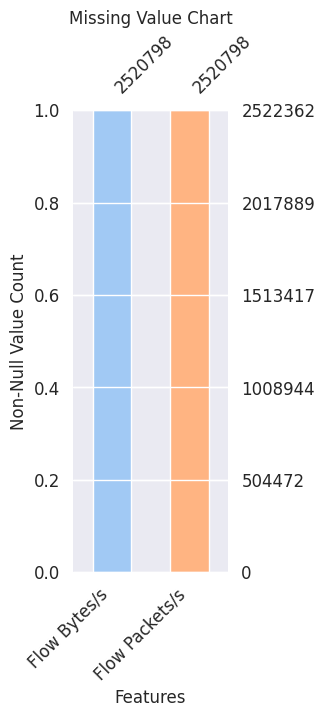

In [ ]:

sns.set_palette('pastel')
colors = sns.color_palette()

missing_vals = [col for col in data.columns if data[col].isna().any()]

fig, ax = plt.subplots(figsize = (2, 6))
msno.bar(data[missing_vals], ax = ax, fontsize = 12, color = colors)
ax.set_xlabel('Features', fontsize = 12)
ax.set_ylabel('Non-Null Value Count', fontsize = 12)
ax.set_title('Missing Value Chart', fontsize = 12)
plt.show()

Dealing with missing values (Columns with missing data)

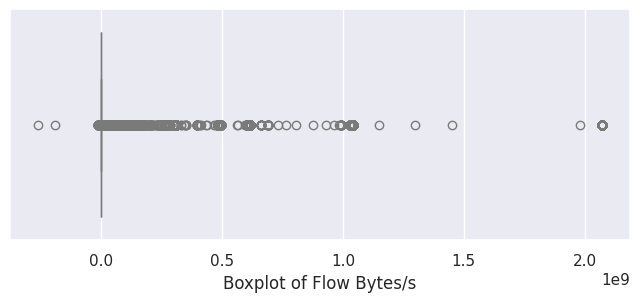

In [ ]:
# Reset the index to ensure it's unique before plotting.
data = data.reset_index(drop=True)

plt.figure(figsize=(8, 3))
sns.boxplot(x=data['Flow Bytes/s'])
plt.xlabel('Boxplot of Flow Bytes/s')
plt.show()

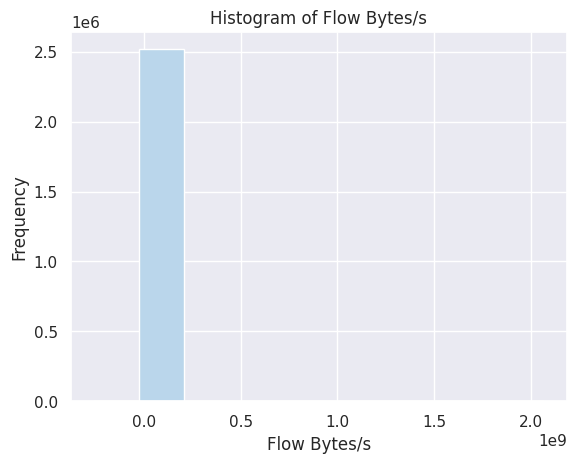

In [ ]:
colors = sns.color_palette('Blues')
plt.hist(data['Flow Bytes/s'], color = colors[1])
plt.title('Histogram of Flow Bytes/s')
plt.xlabel('Flow Bytes/s')
plt.ylabel('Frequency')
plt.show()

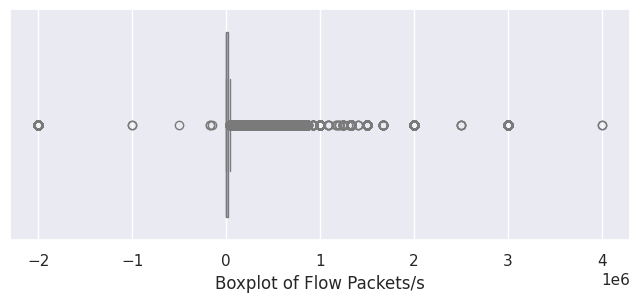

In [ ]:
plt.figure(figsize = (8, 3))
sns.boxplot(x = data['Flow Packets/s'])
plt.xlabel('Boxplot of Flow Packets/s')
plt.show()

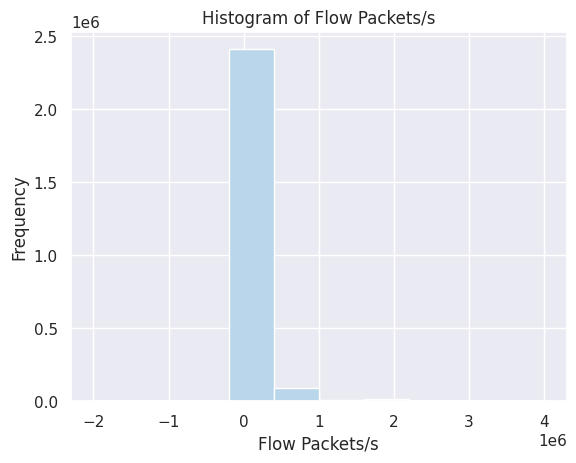

In [ ]:

plt.hist(data['Flow Packets/s'], color = colors[1])
plt.title('Histogram of Flow Packets/s')
plt.xlabel('Flow Packets/s')
plt.ylabel('Frequency')
plt.show()

In [ ]:


med_flow_bytes = data['Flow Bytes/s'].median()
med_flow_packets = data['Flow Packets/s'].median()

print('Median of Flow Bytes/s: ', med_flow_bytes)
print('Median of Flow Packets/s: ', med_flow_packets)

Median of Flow Bytes/s:  3715.0378579999997
Median of Flow Packets/s:  69.742244285


In [ ]:
# Filling missing values with median
data['Flow Bytes/s'].fillna(med_flow_bytes, inplace = True)
data['Flow Packets/s'].fillna(med_flow_packets, inplace = True)



<ipython-input-54-06f894be481b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Flow Bytes/s'].fillna(med_flow_bytes, inplace = True)
<ipython-input-54-06f894be481b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [ ]:
print('Number of \'Flow Bytes/s\' missing values:', data['Flow Bytes/s'].isna().sum())
print('Number of \'Flow Packets/s\' missing values:', data['Flow Packets/s'].isna().sum())



Number of 'Flow Bytes/s' missing values: 0
Number of 'Flow Packets/s' missing values: 0


## Analysing Patterns using Visualisations

Visualization of column correlation. Also, plotting Heat Map

In [ ]:


data['Label'].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [ ]:
# Types of attacks & normal instances (BENIGN)
data['Label'].value_counts()

Label
BENIGN                        2096484
DoS Hulk                       172849
DDoS                           128016
PortScan                        90819
DoS GoldenEye                   10286
FTP-Patator                      5933
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1953
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [ ]:
# Creating a dictionary that maps each label to its attack type
attack_map = {
    'BENIGN': 'BENIGN',
    'DDoS': 'DDoS',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'PortScan': 'Port Scan',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Bot': 'Bot',
    'Web Attack � Brute Force': 'Web Attack',
    'Web Attack � XSS': 'Web Attack',
    'Web Attack � Sql Injection': 'Web Attack',
    'Infiltration': 'Infiltration',
    'Heartbleed': 'Heartbleed'
}

# Creating a new column 'Attack Type' in the DataFrame based on the attack_map dictionary
data['Attack Type'] = data['Label'].map(attack_map)


In [ ]:
data['Attack Type'].value_counts()

Attack Type
BENIGN          2096484
DoS              193748
DDoS             128016
Port Scan         90819
Brute Force        9152
Web Attack         2143
Bot                1953
Infiltration         36
Heartbleed           11
Name: count, dtype: int64

In [ ]:
data.drop('Label', axis = 1, inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Attack Number'] = le.fit_transform(data['Attack Type'])

print(data['Attack Number'].unique())

[0 3 7 1 6 8 2 4 5]


In [ ]:
# Printing corresponding attack type for each encoded value
encoded_values = data['Attack Number'].unique()
for val in sorted(encoded_values):
    print(f"{val}: {le.inverse_transform([val])[0]}")

0: BENIGN
1: Bot
2: Brute Force
3: DDoS
4: DoS
5: Heartbleed
6: Infiltration
7: Port Scan
8: Web Attack


In [ ]:

corr = data.corr(numeric_only = True).round(2)
corr.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)


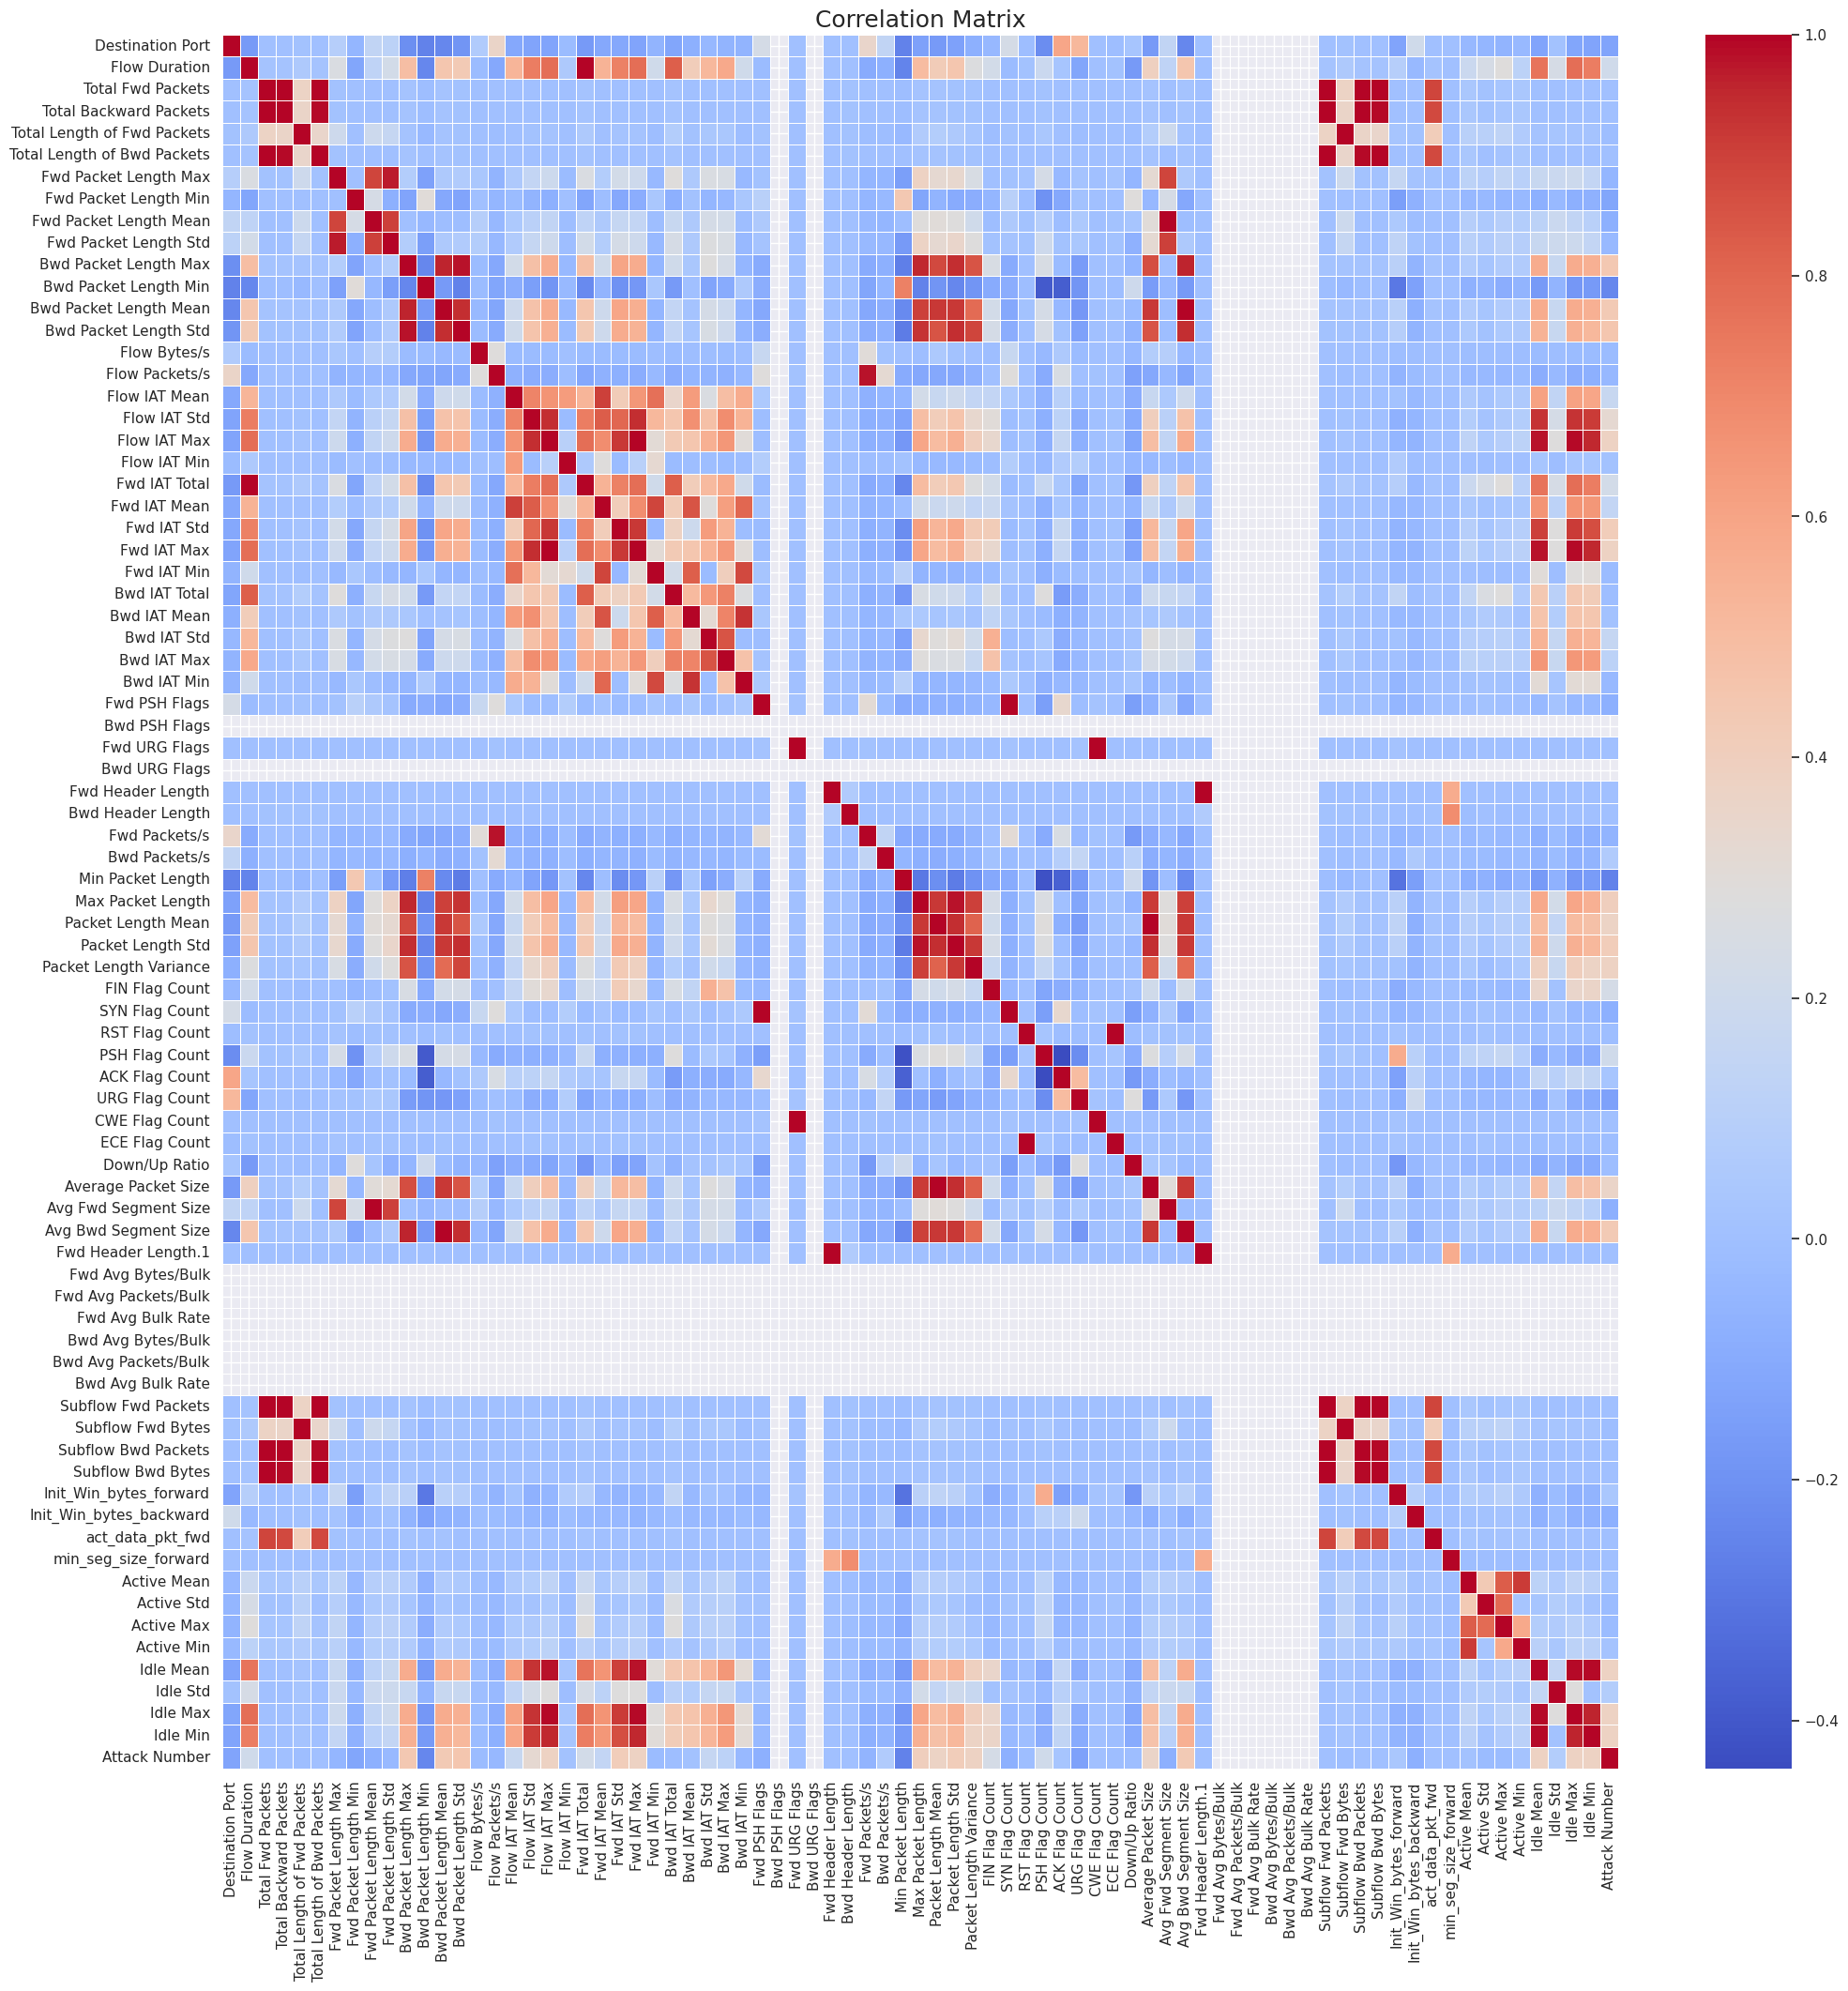

In [ ]:

fig, ax = plt.subplots(figsize = (24, 24))
sns.heatmap(corr, cmap = 'coolwarm', annot = False, linewidth = 0.5)
plt.title('Correlation Matrix', fontsize = 18)
plt.show()

In [ ]:

# Positive correlation features for 'Attack Number'
pos_corr_features = corr['Attack Number'][(corr['Attack Number'] > 0) & (corr['Attack Number'] < 1)].index.tolist()

print("Features with positive correlation with 'Attack Number':\n")
for i, feature in enumerate(pos_corr_features, start = 1):
    corr_value = corr.loc[feature, 'Attack Number']
    print('{:<3} {:<24} :{}'.format(f'{i}.', feature, corr_value))


Features with positive correlation with 'Attack Number':

1.  Flow Duration            :0.21
2.  Bwd Packet Length Max    :0.44
3.  Bwd Packet Length Mean   :0.43
4.  Bwd Packet Length Std    :0.45
5.  Flow IAT Mean            :0.17
6.  Flow IAT Std             :0.33
7.  Flow IAT Max             :0.38
8.  Flow IAT Min             :0.01
9.  Fwd IAT Total            :0.22
10. Fwd IAT Mean             :0.15
11. Fwd IAT Std              :0.41
12. Fwd IAT Max              :0.38
13. Bwd IAT Mean             :0.01
14. Bwd IAT Std              :0.16
15. Bwd IAT Max              :0.12
16. Bwd Packets/s            :0.07
17. Max Packet Length        :0.4
18. Packet Length Mean       :0.37
19. Packet Length Std        :0.41
20. Packet Length Variance   :0.38
21. FIN Flag Count           :0.23
22. PSH Flag Count           :0.21
23. ACK Flag Count           :0.03
24. Average Packet Size      :0.36
25. Avg Bwd Segment Size     :0.43
26. Init_Win_bytes_forward   :0.04
27. Active Mean              :0.0

In [ ]:
print(f'Number of considerable important features: {len(pos_corr_features)}')

Number of considerable important features: 32


In [ ]:
# Checking for columns with zero standard deviation (the blank squares in the heatmap)
std = data.std(numeric_only = True)
zero_std_cols = std[std == 0].index.tolist()
zero_std_cols


['Bwd PSH Flags',
 'Bwd URG Flags',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']


## Visualization of column relationships (Categorical Variables)


All the features in our dataset is numerical. We have one Categorical Variable.

<ipython-input-68-f1b8057d9063>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Attack Type', data = attacks, palette = 'pastel', order = attacks['Attack Type'].value_counts().index)


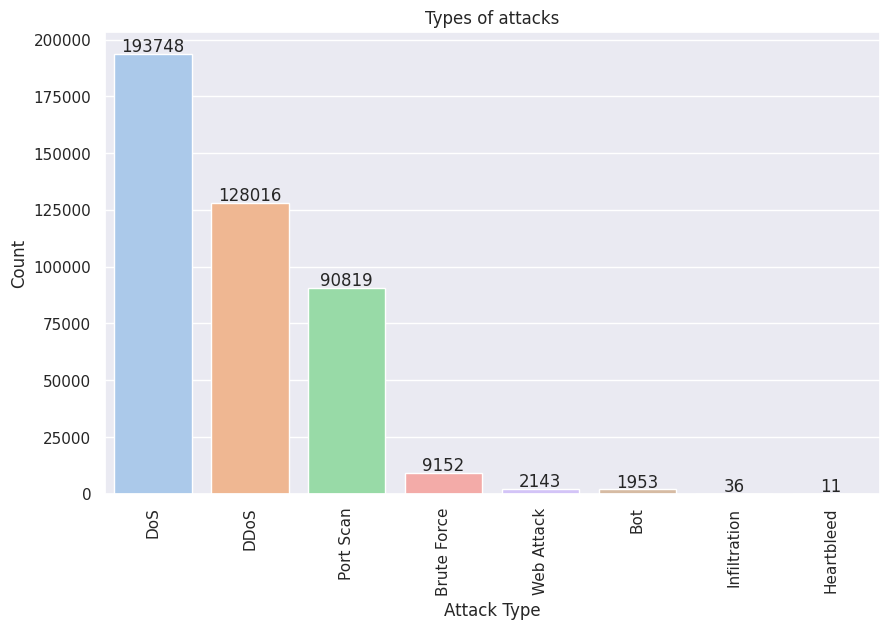

In [ ]:
# Different 'Attack Type' in the main dataset excluding 'BENIGN'
attacks = data.loc[data['Attack Type'] != 'BENIGN']

plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'Attack Type', data = attacks, palette = 'pastel', order = attacks['Attack Type'].value_counts().index)
plt.title('Types of attacks')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation = 90)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height() + 1000), ha = 'center')


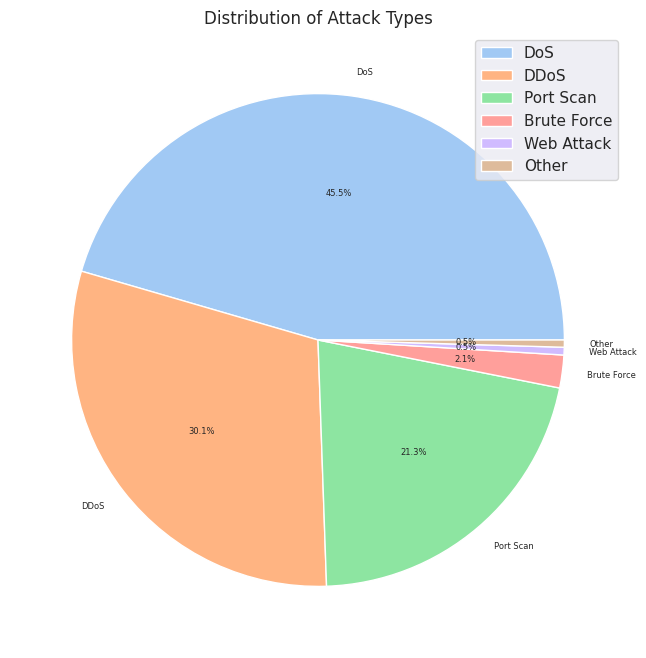

In [ ]:

attack_counts = attacks['Attack Type'].value_counts()
threshold = 0.005
percentages = attack_counts / attack_counts.sum()
small_slices = percentages[percentages < threshold].index.tolist()
attack_counts['Other'] = attack_counts[small_slices].sum()
attack_counts.drop(small_slices, inplace = True)

sns.set_palette('pastel')
plt.figure(figsize = (8, 8))
plt.pie(attack_counts.values, labels = attack_counts.index, autopct = '%1.1f%%', textprops={'fontsize': 6})
plt.title('Distribution of Attack Types')
plt.legend(attack_counts.index, loc = 'best')
plt.show()

In [ ]:
# Creating a boxplot for each attack type with the columns of sampled dataset
for attack_type in sampled_data['Attack Type'].unique():
    attack_data = sampled_data[sampled_data['Attack Type'] == attack_type]
    plt.figure(figsize=(20, 20))
    sns.boxplot(data = attack_data.drop(columns = ['Attack Type']), orient = 'h')
    plt.title(f'Boxplot of Features for Attack Type: {attack_type}')
    plt.xlabel('Feature Value')
    plt.show()

NameError: name 'sampled_data' is not defined

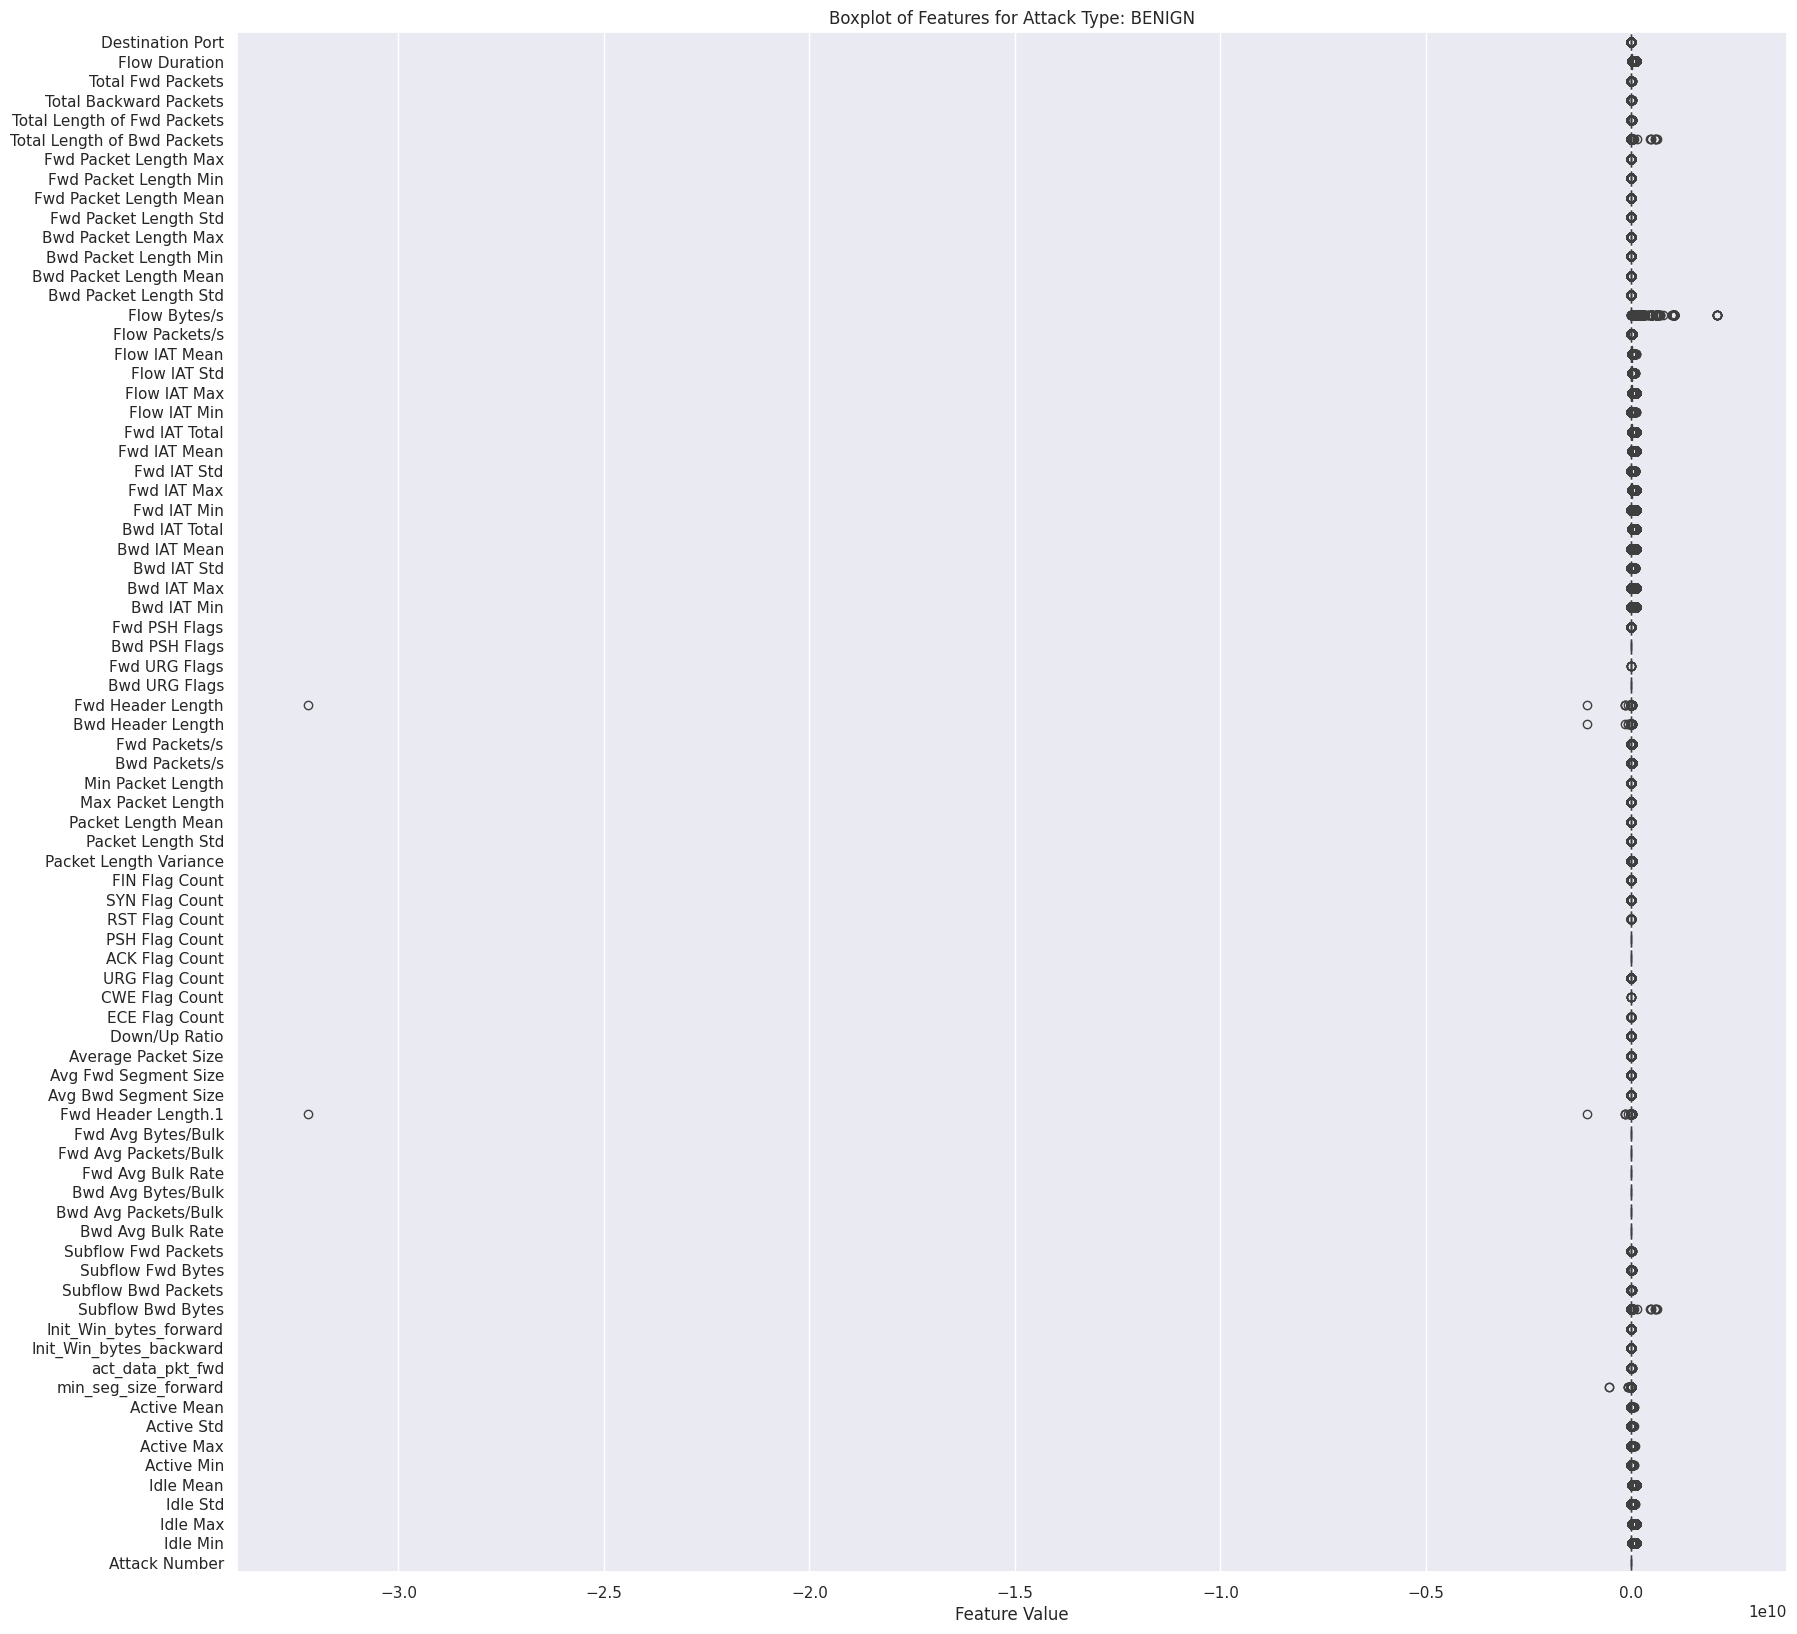

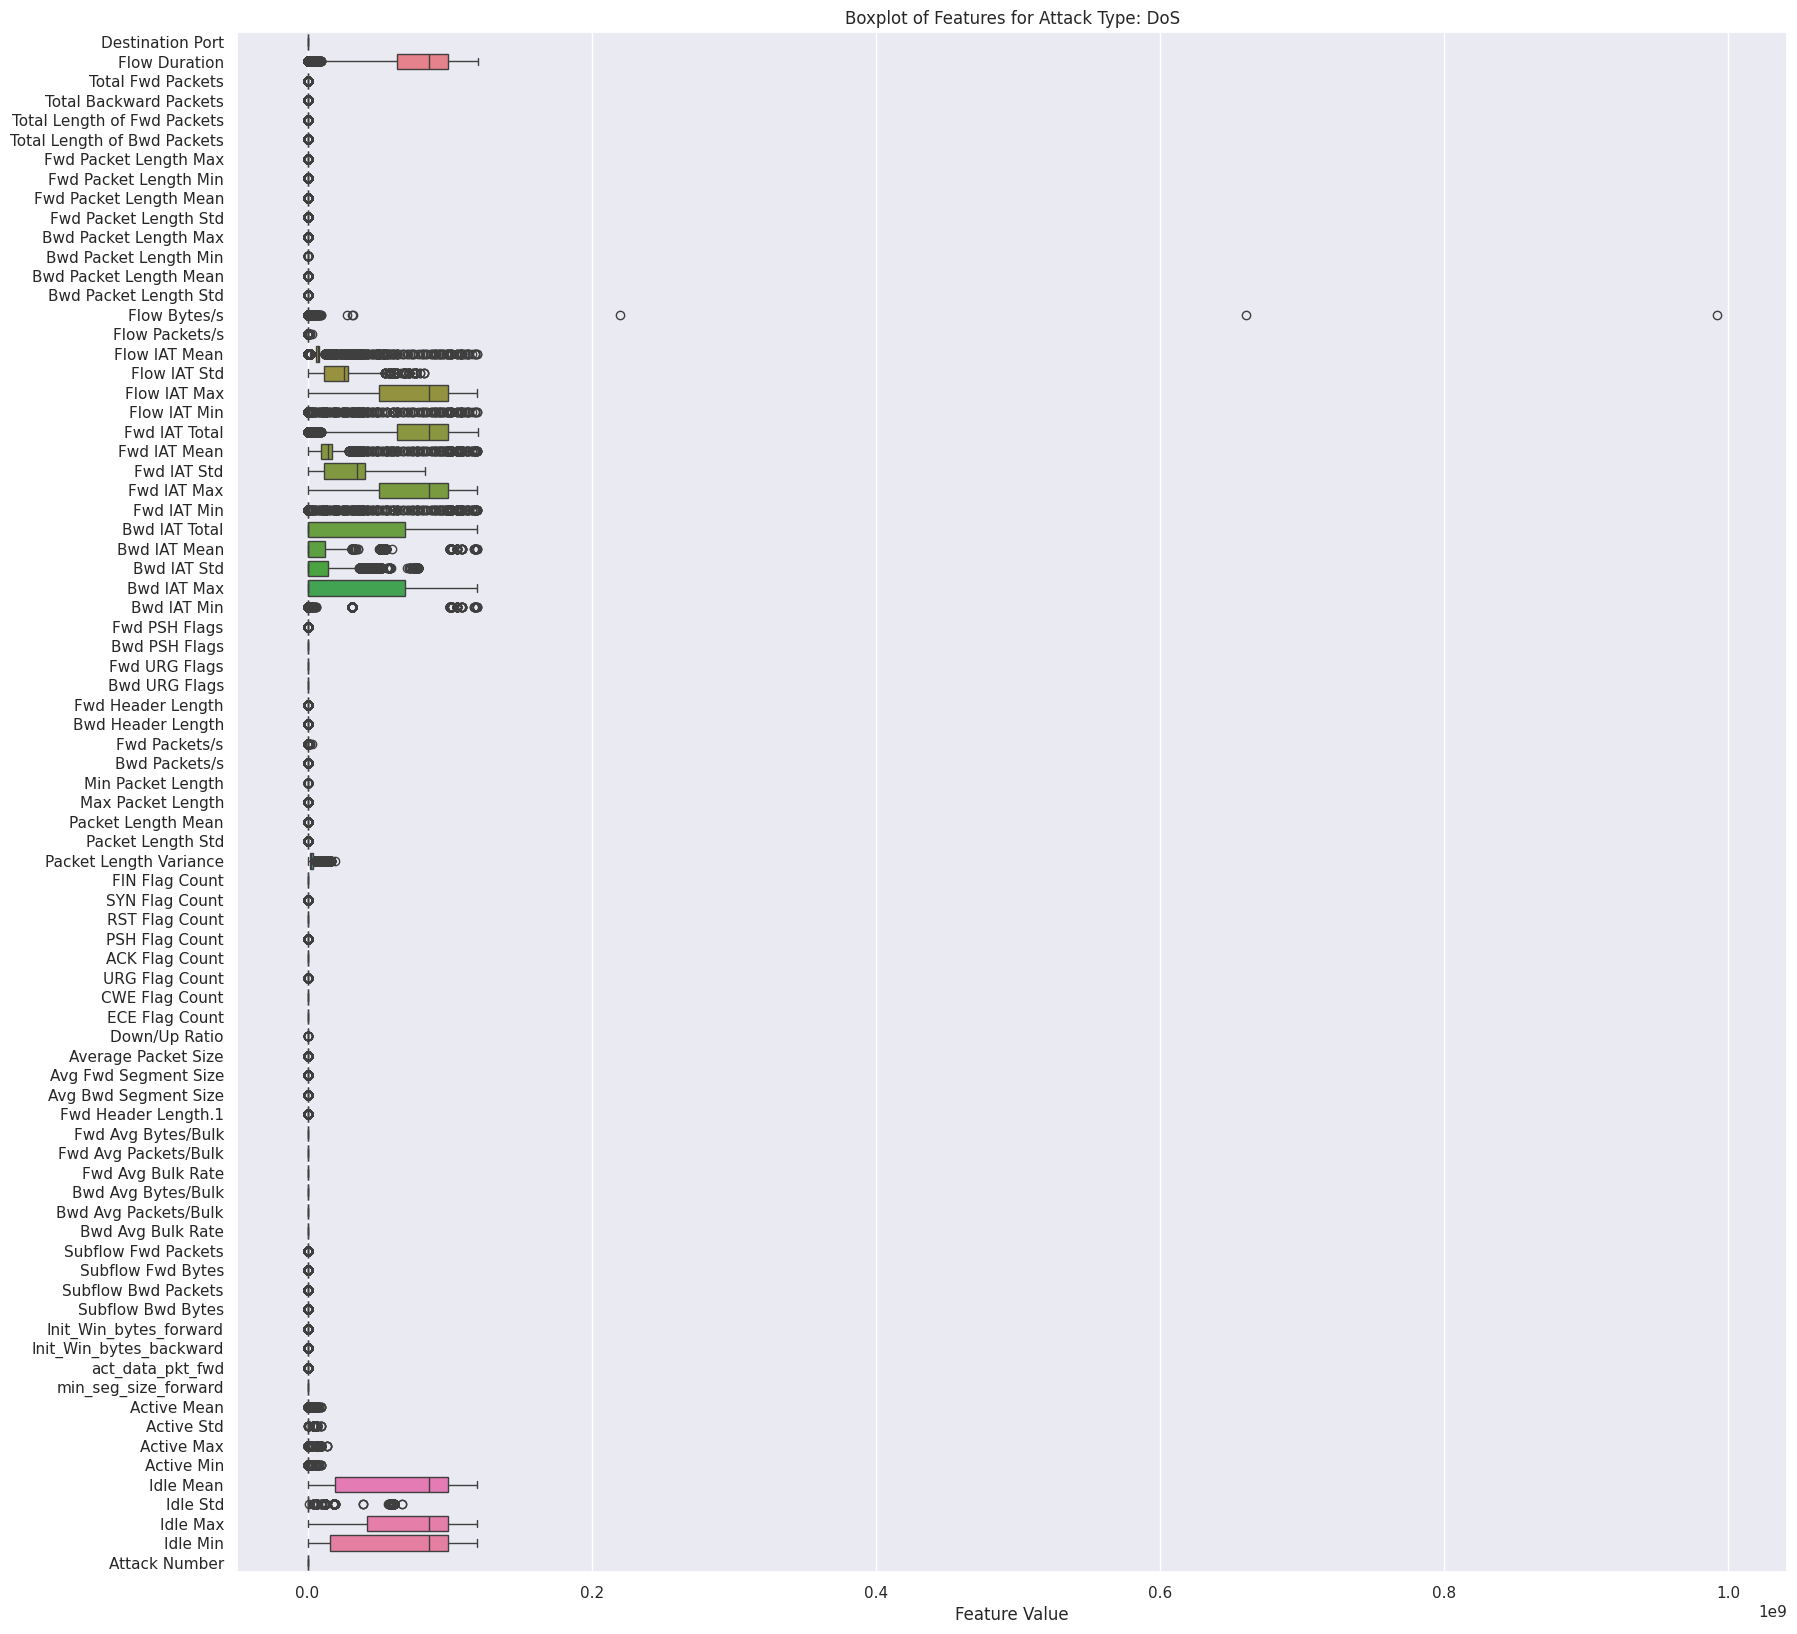

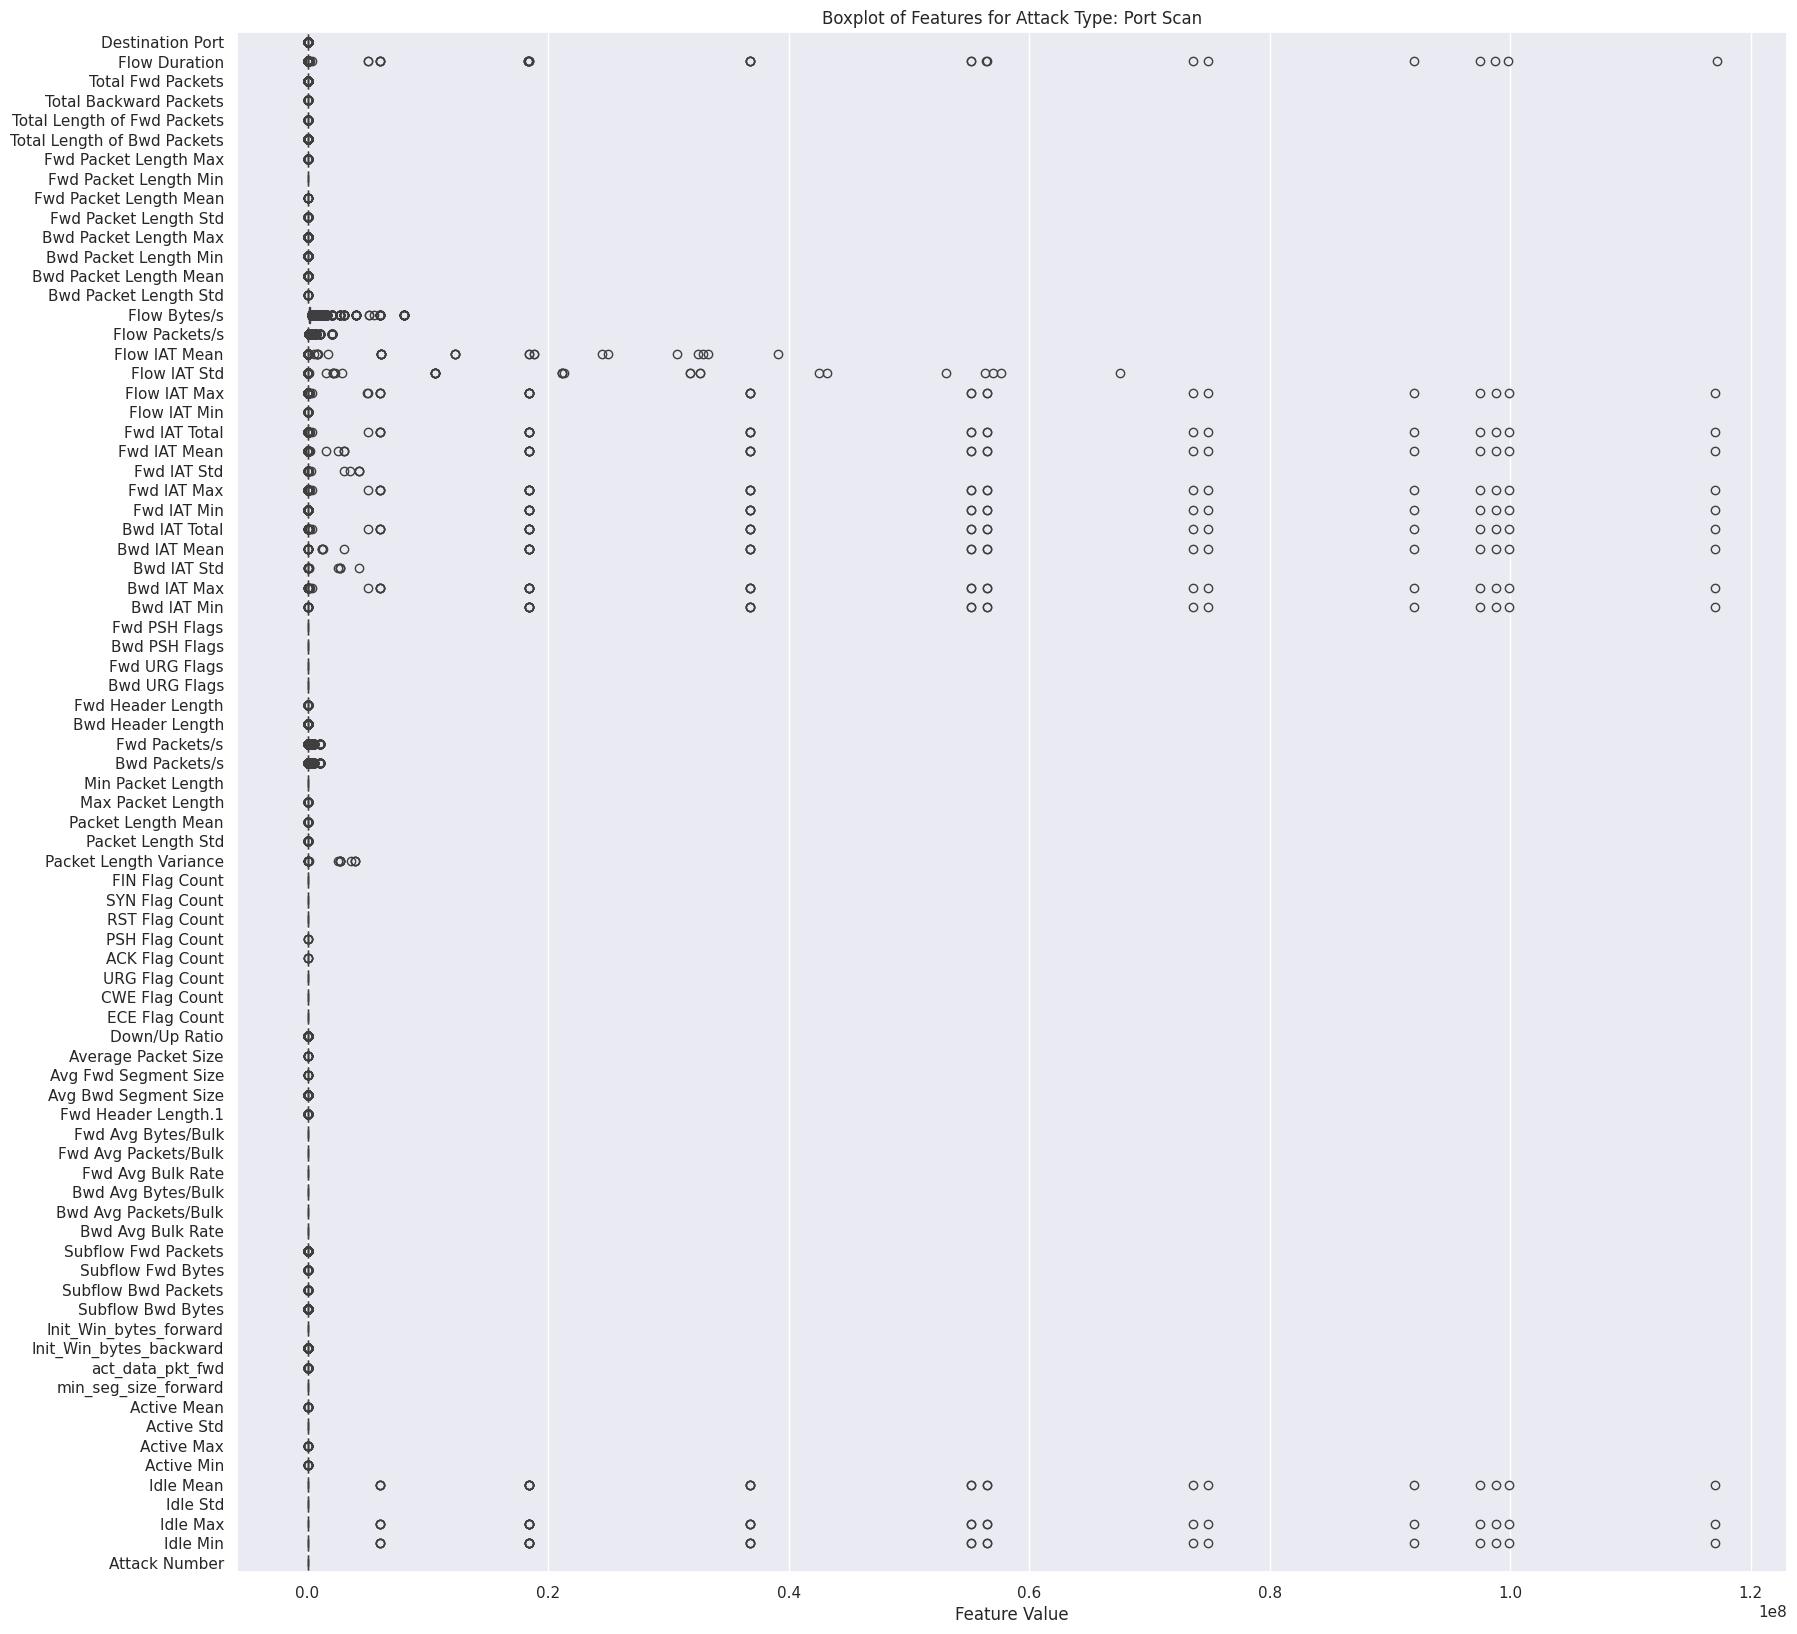

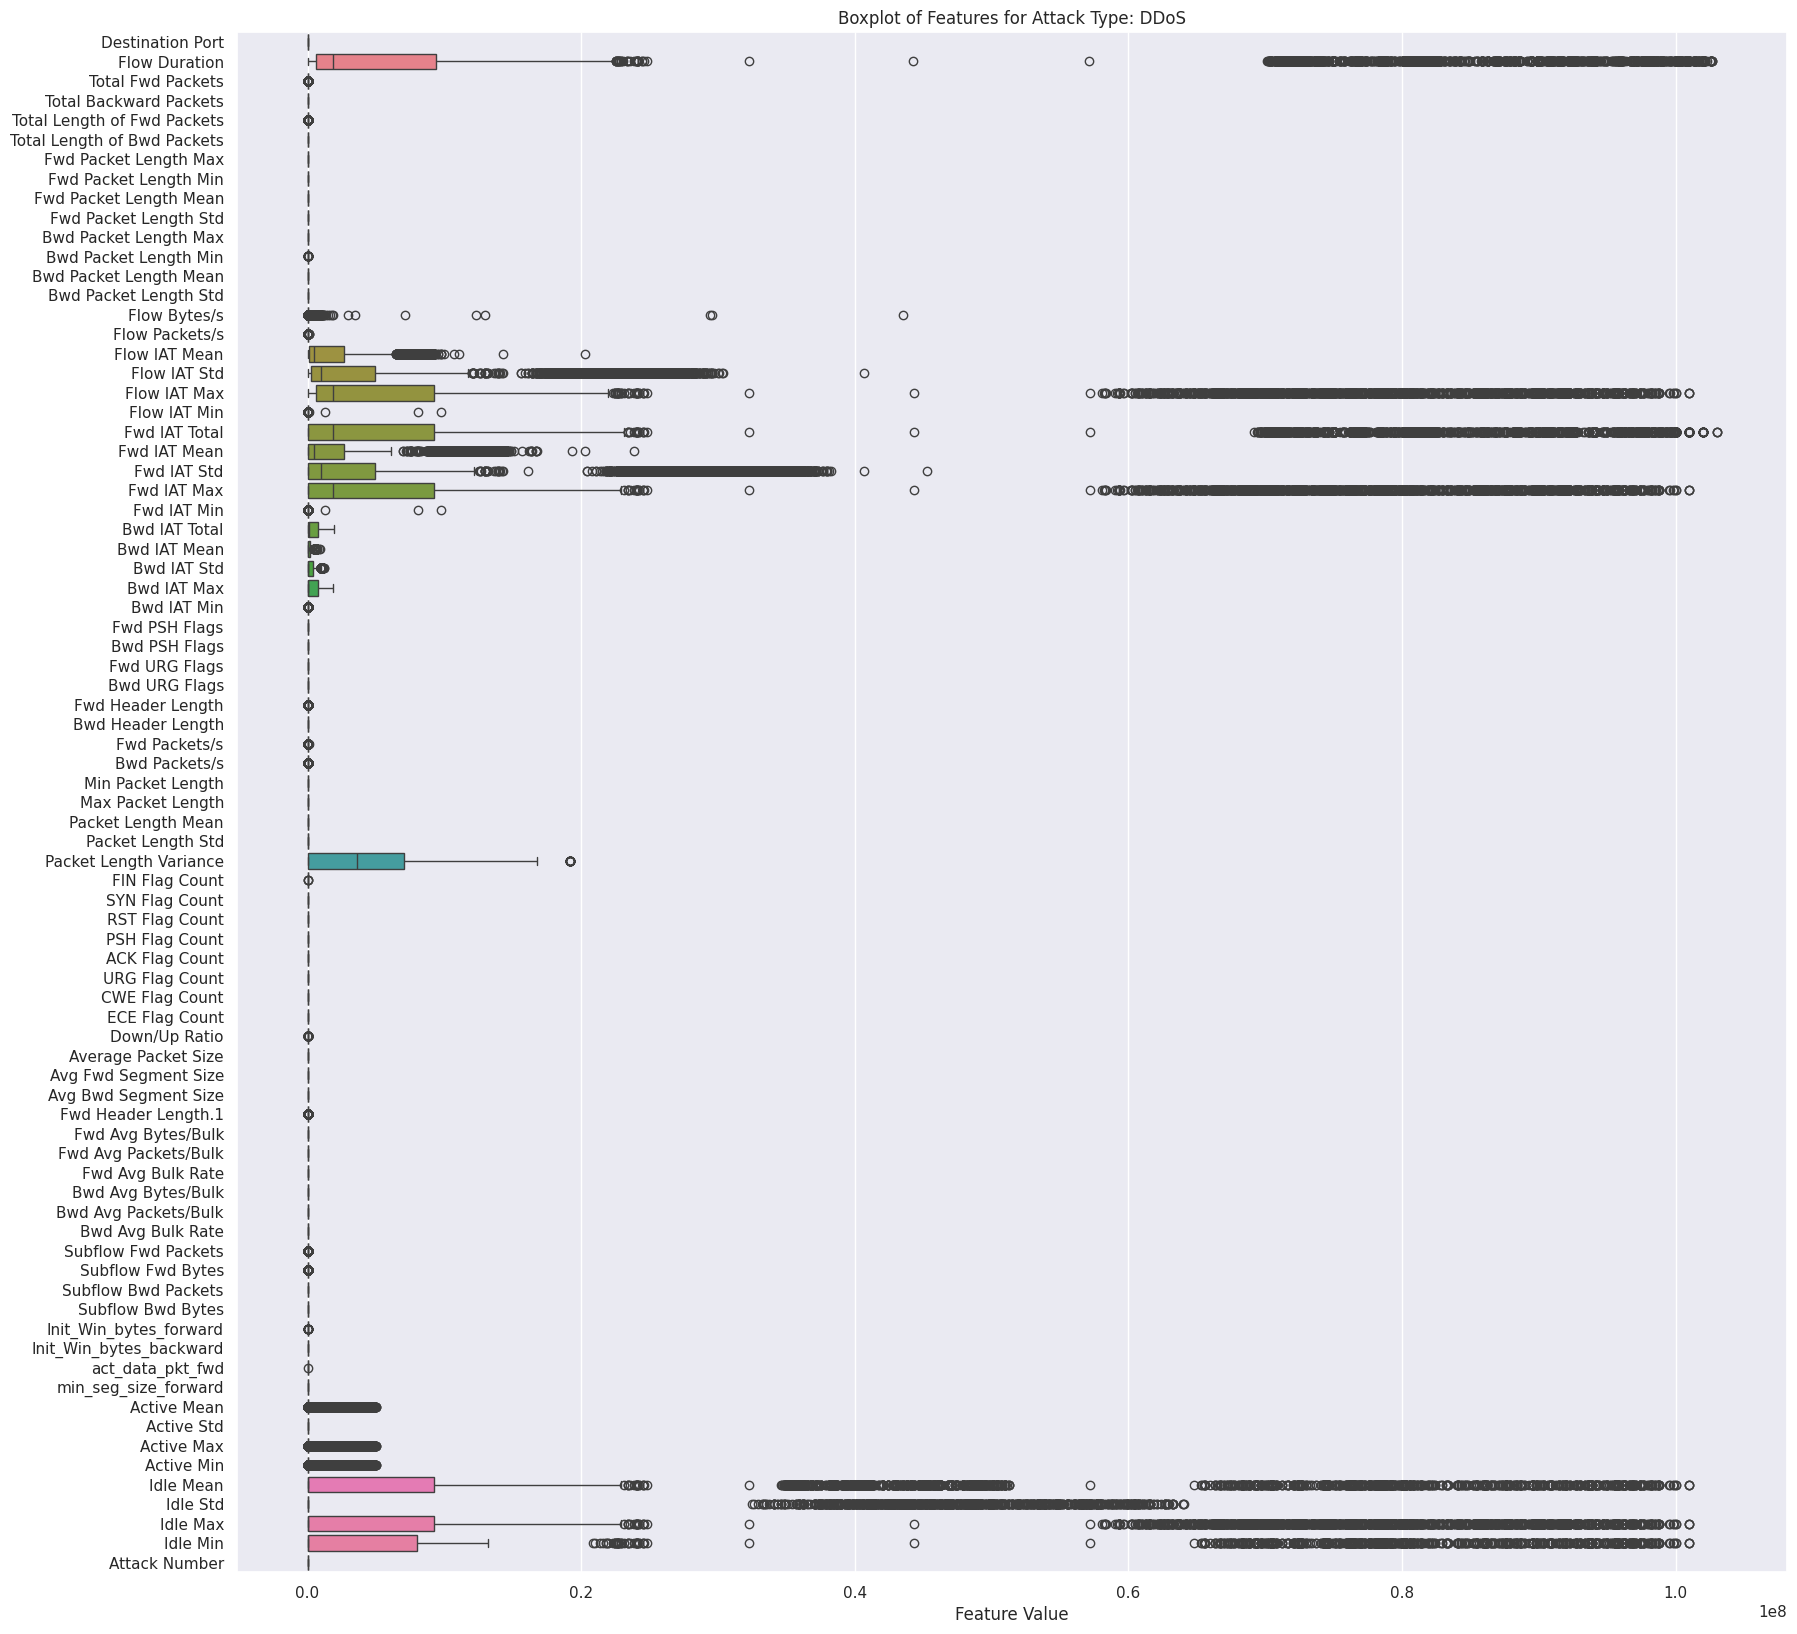

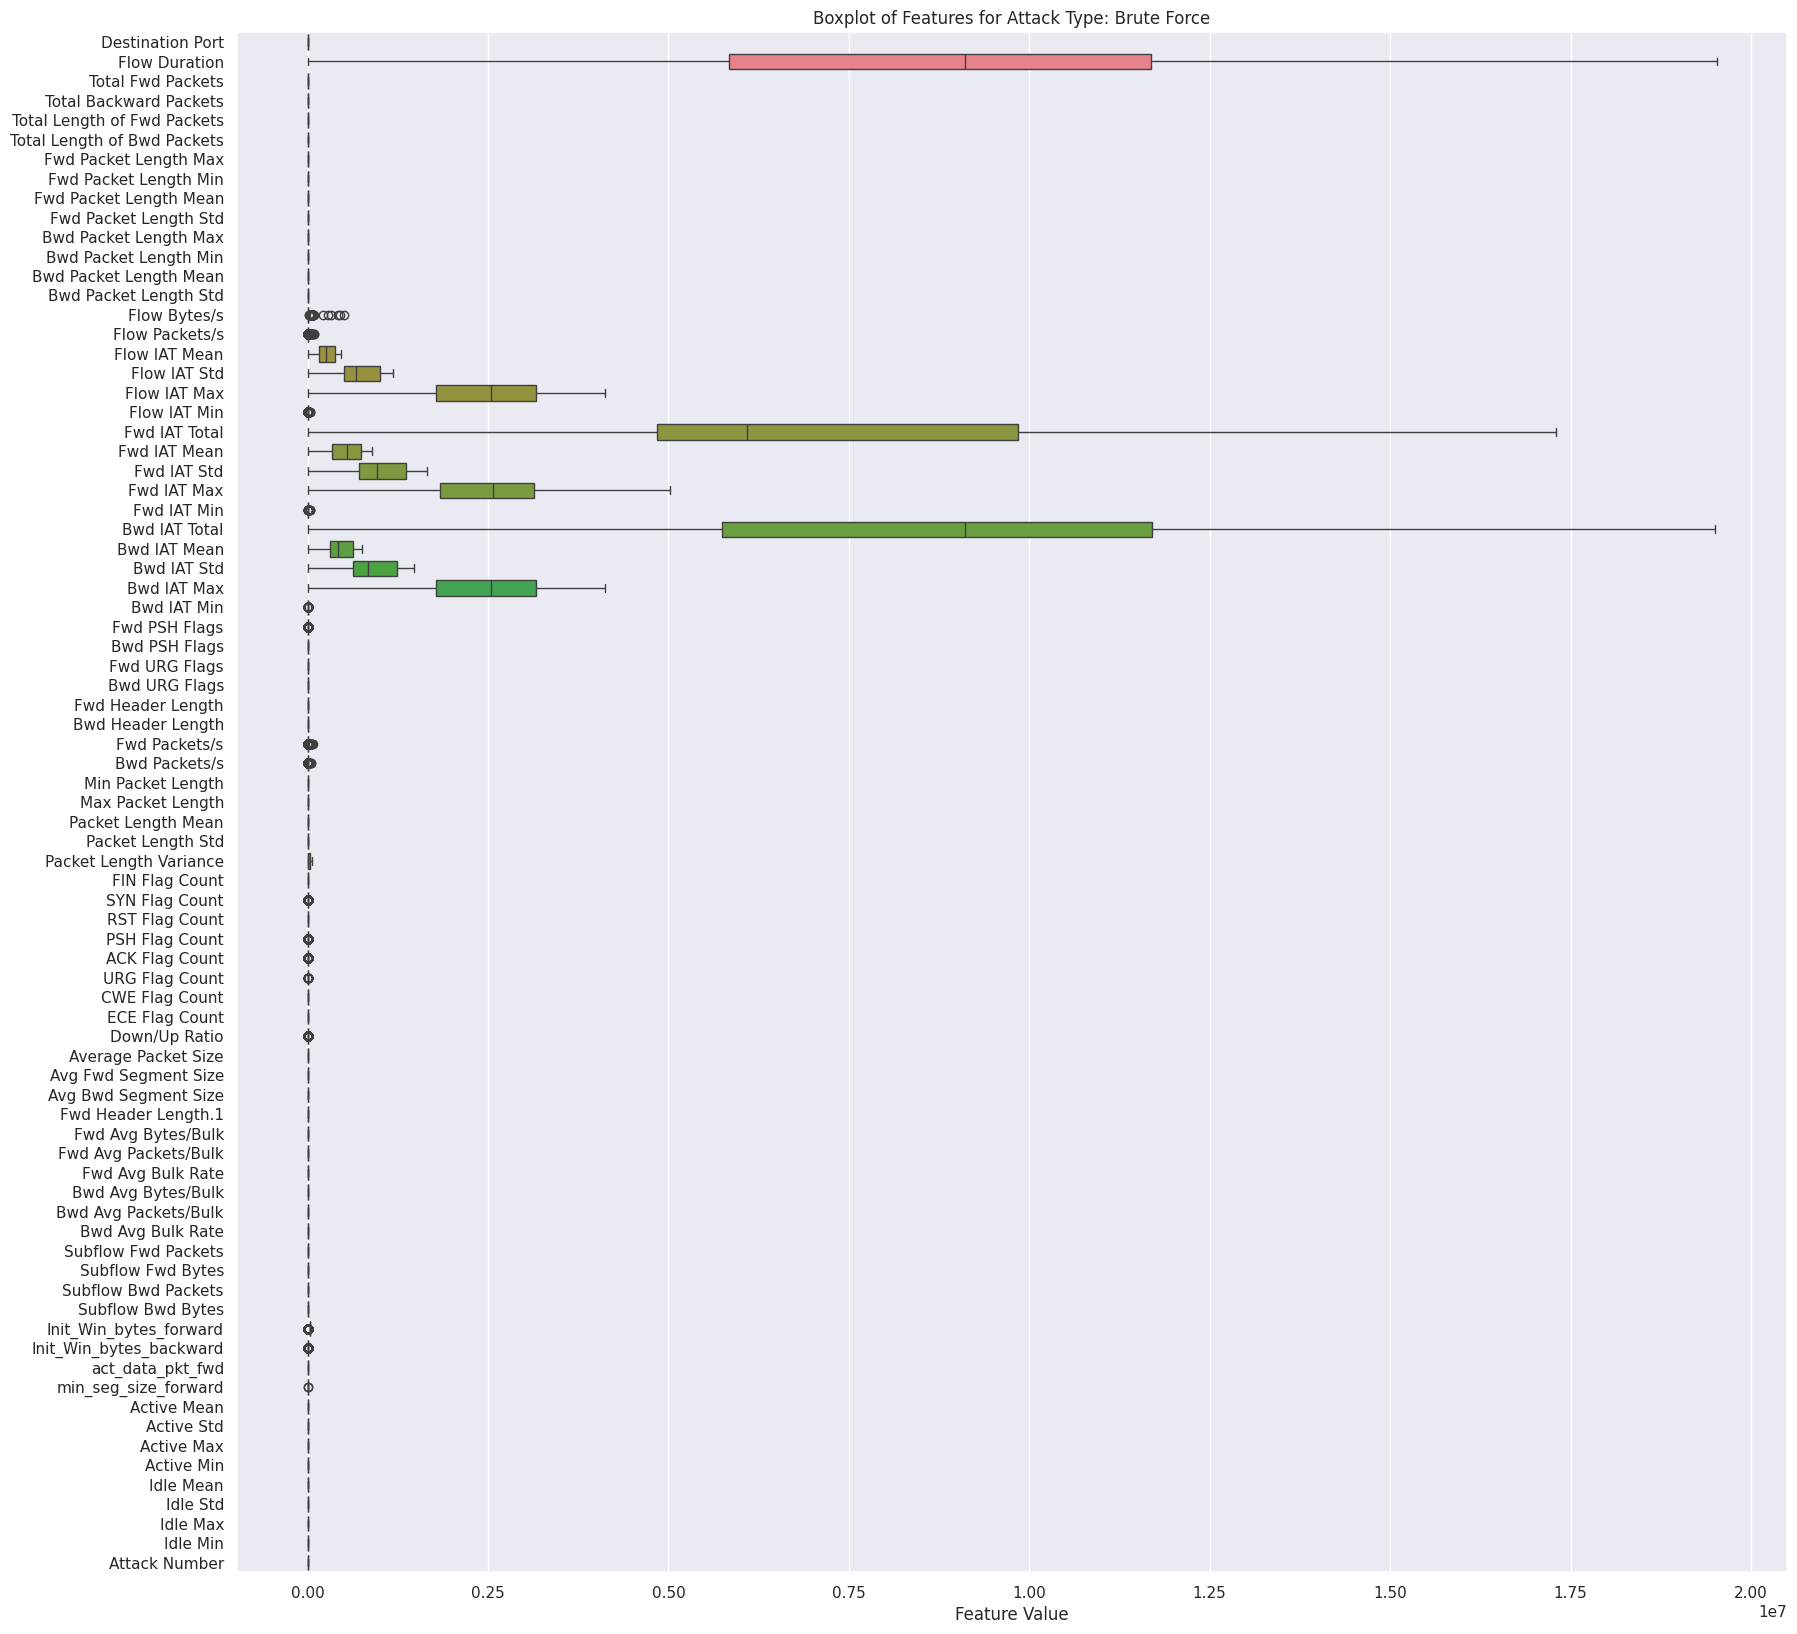

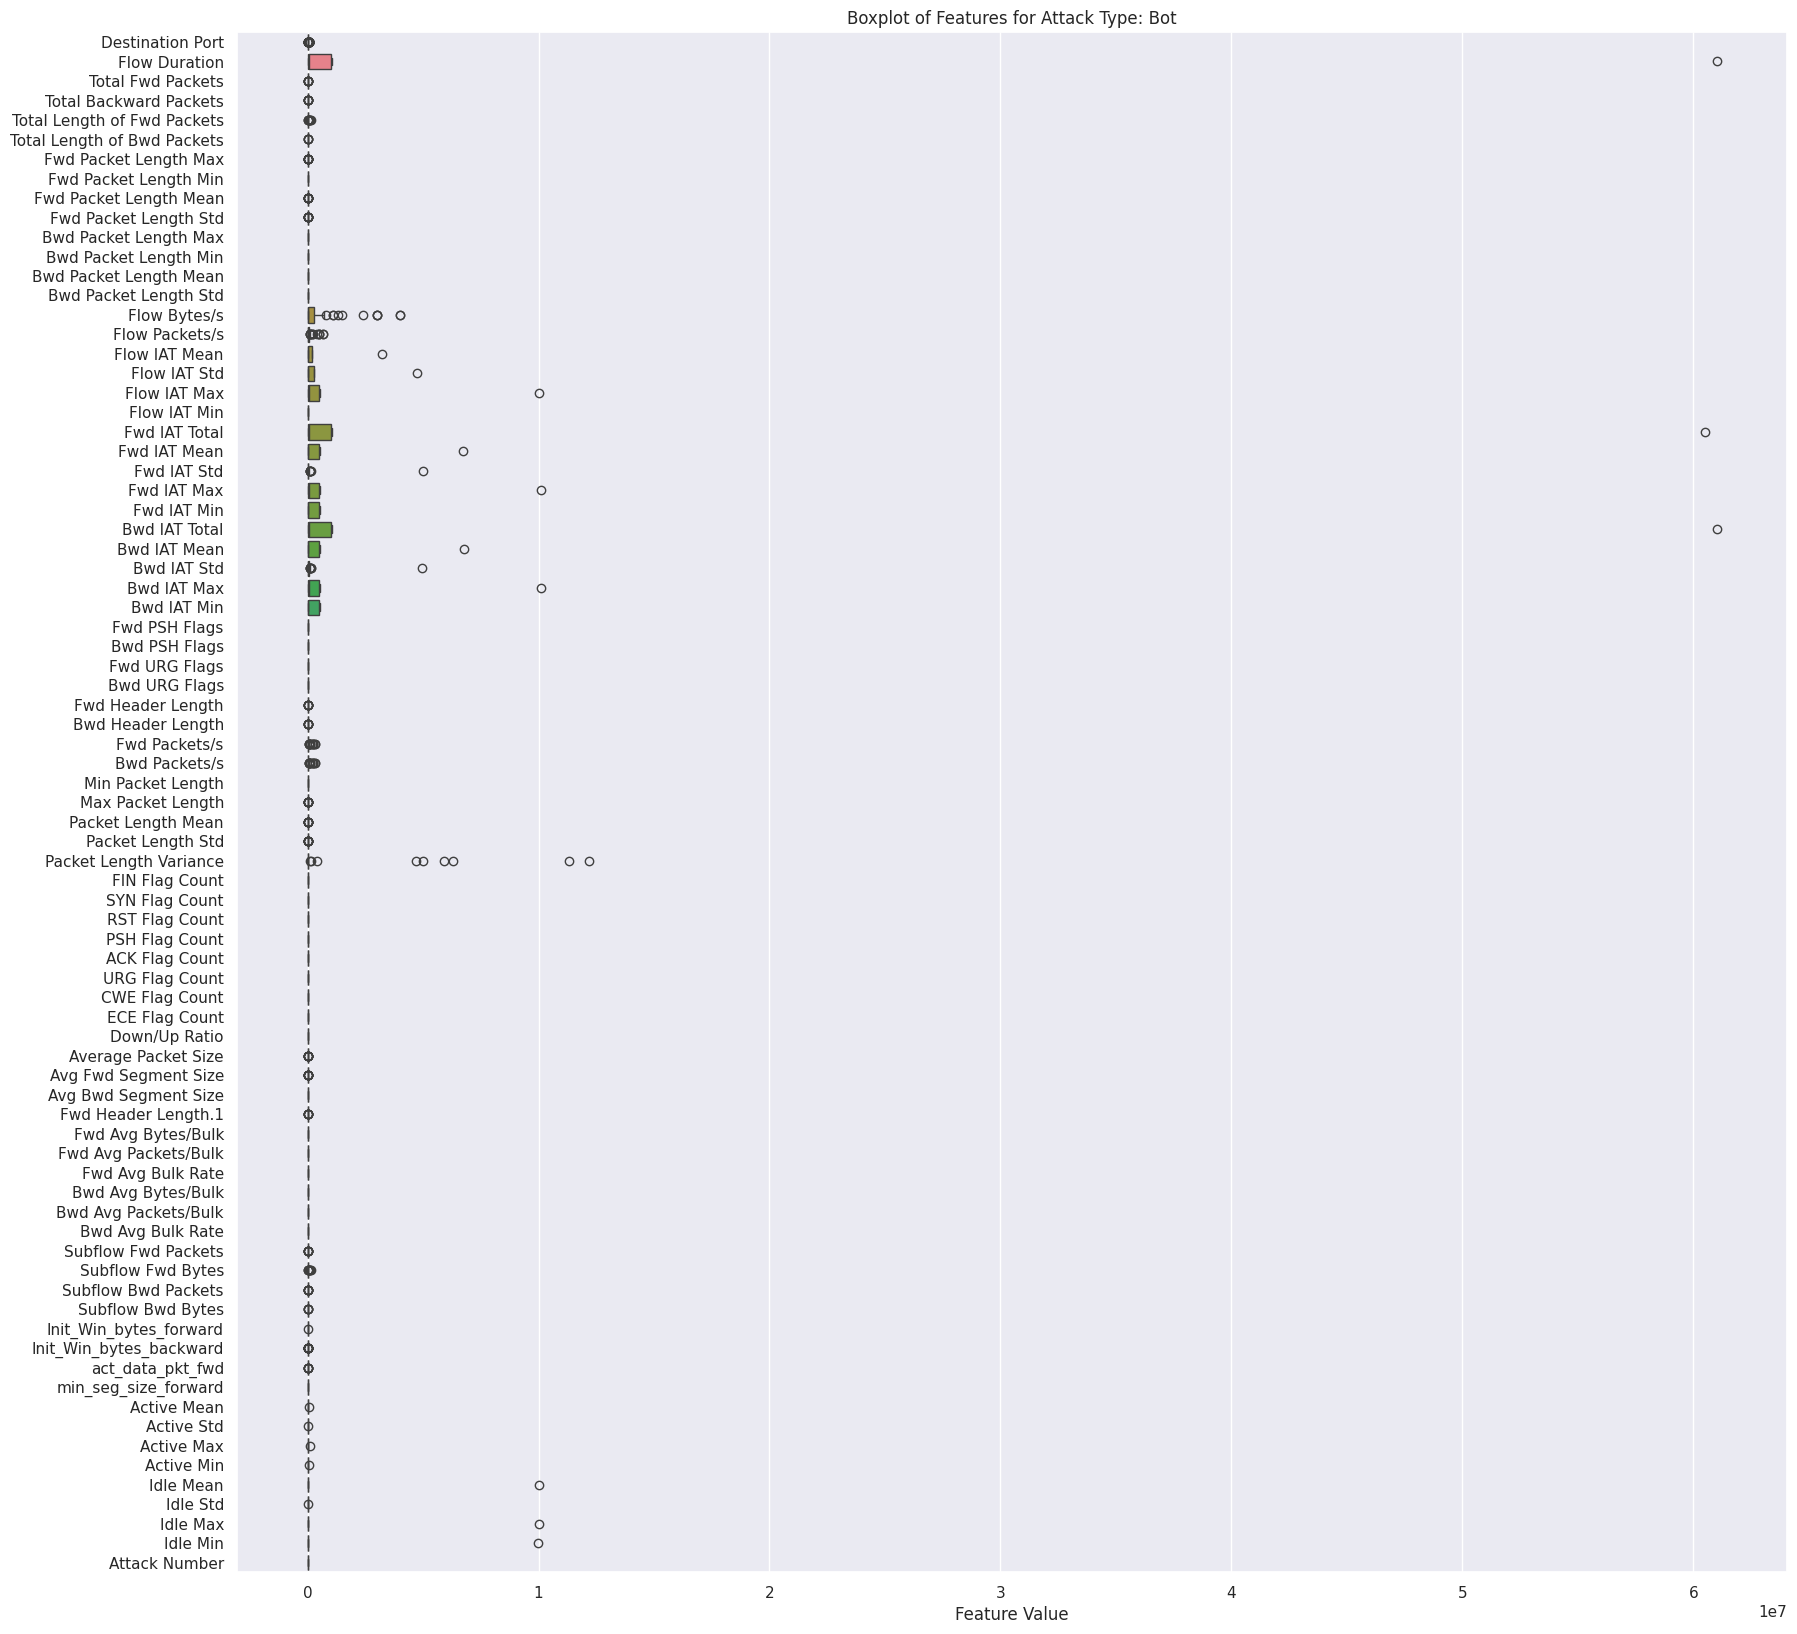

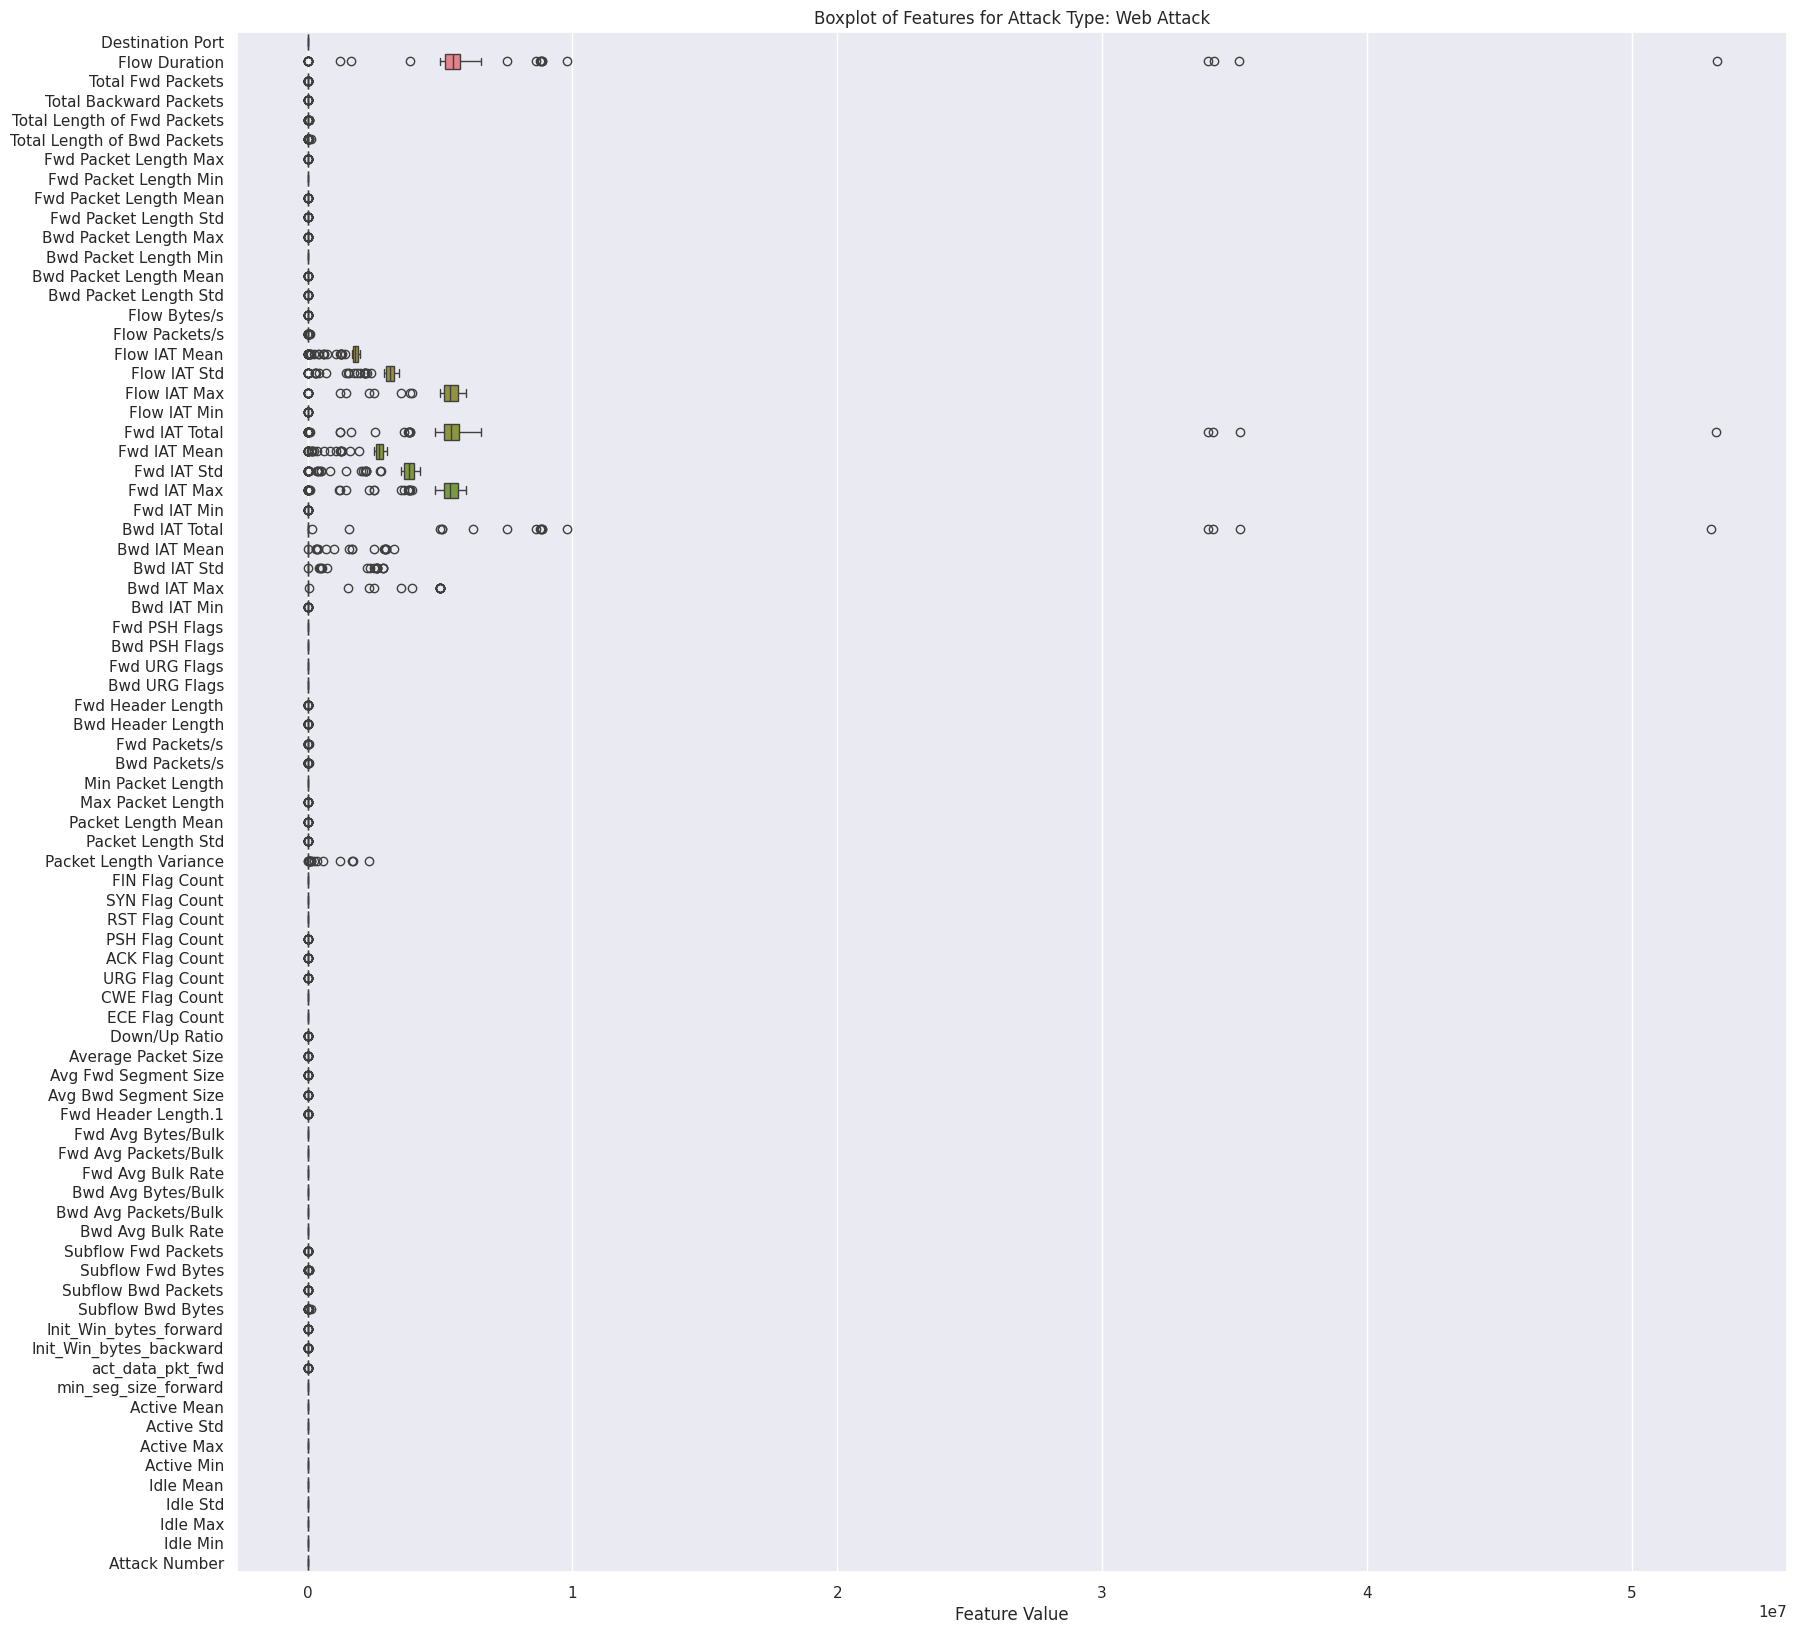

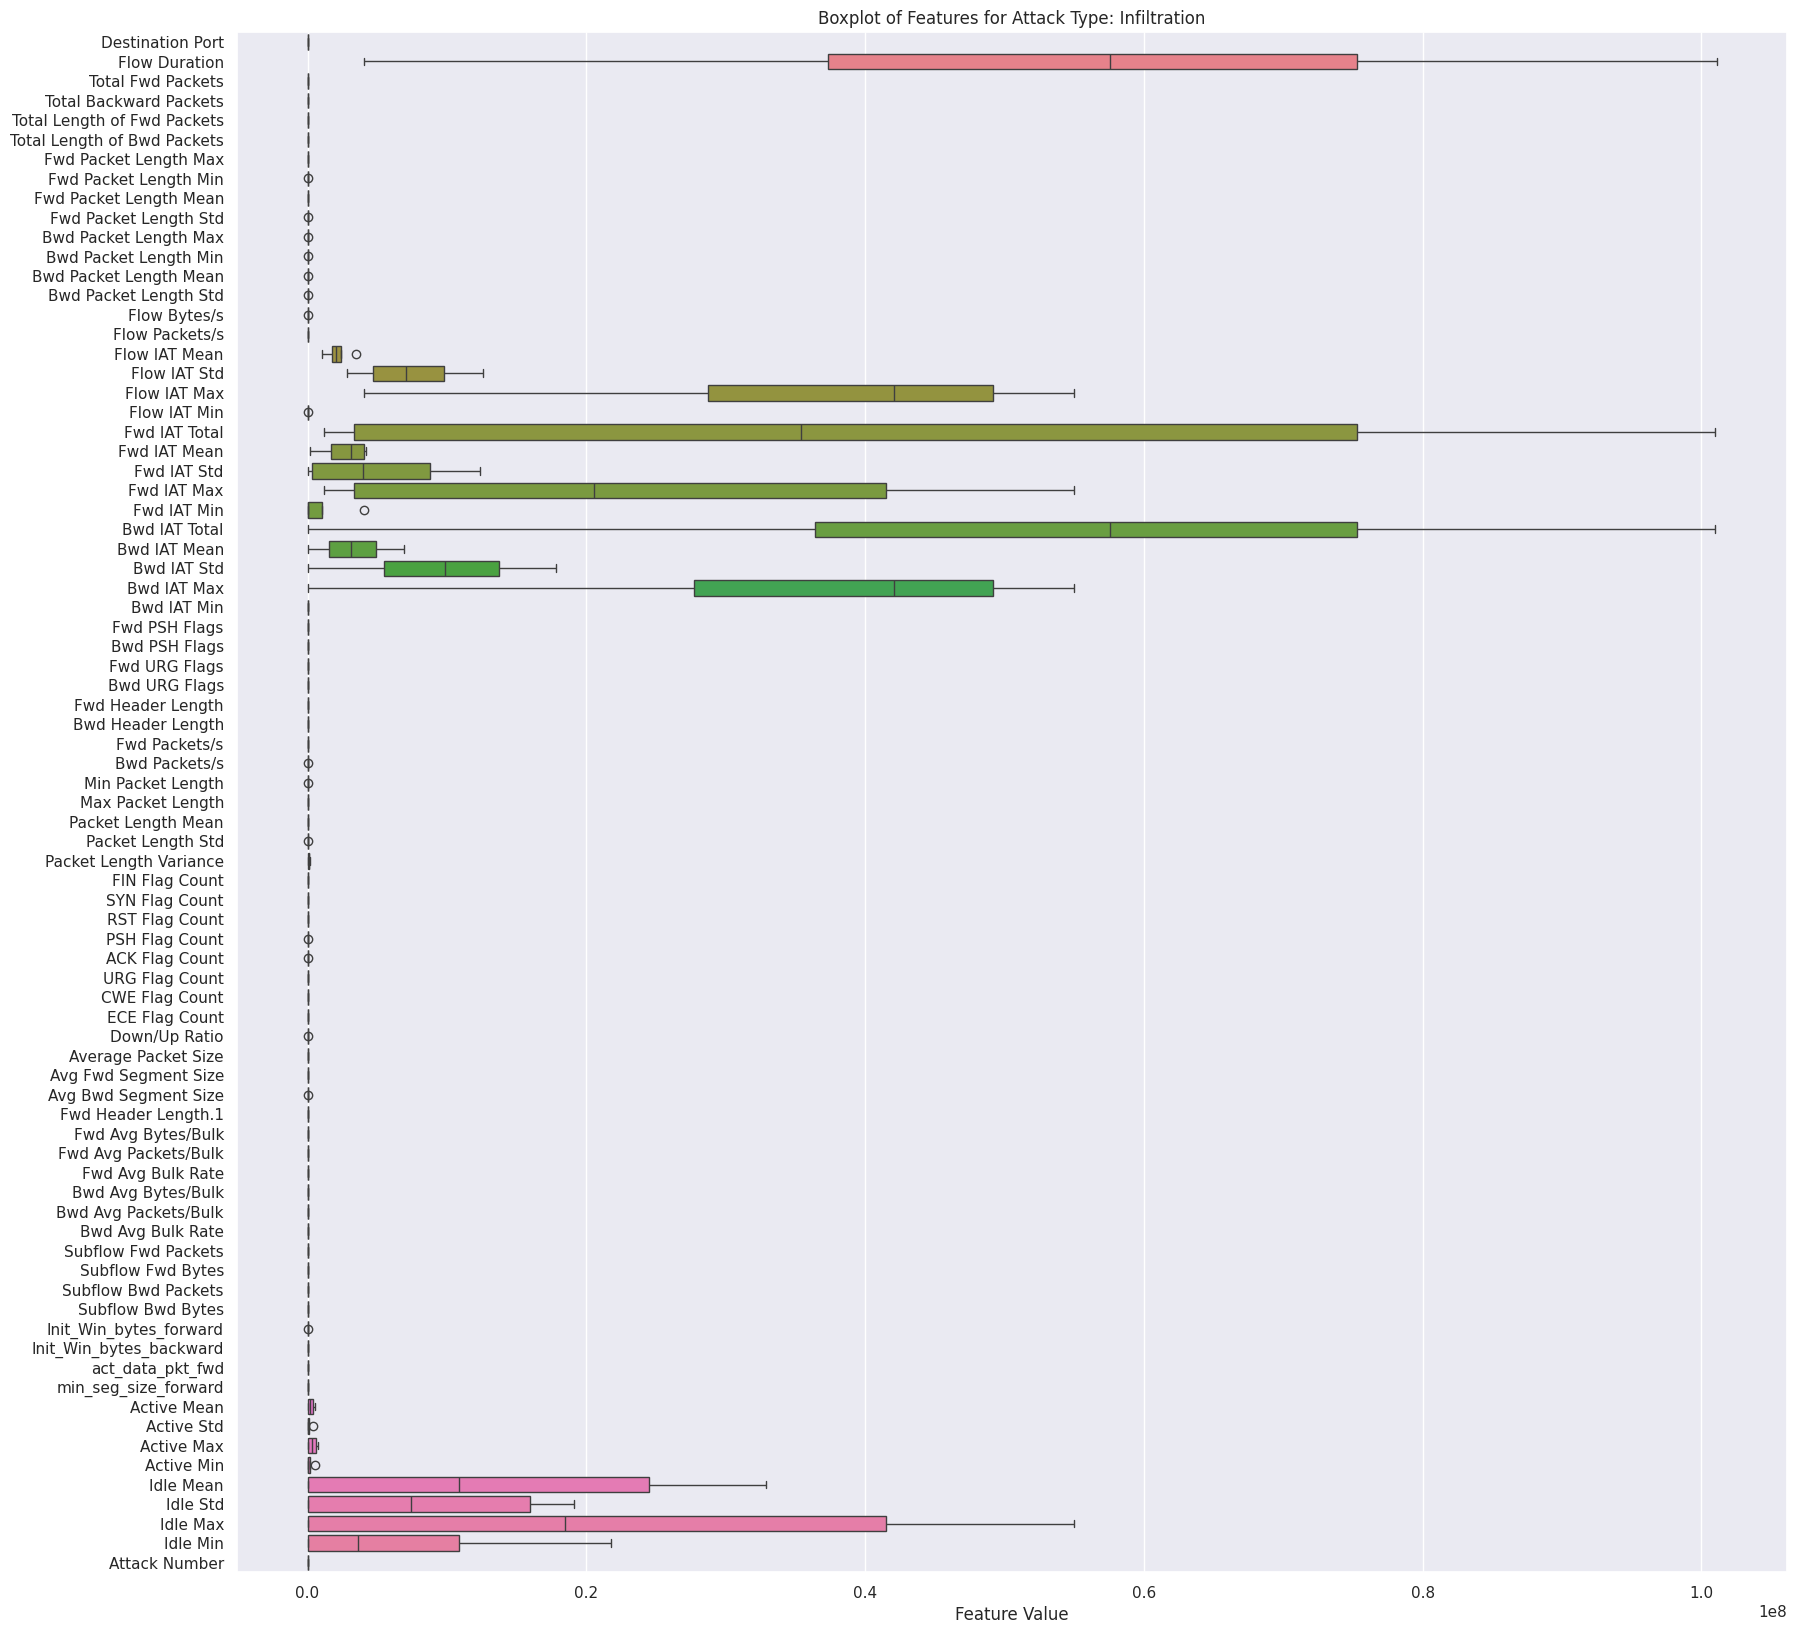

In [ ]:
# Creating a boxplot for each attack type with the columns of sampled dataset
# Assuming 'sampled_data' was intended to be a sample of the original data
# If not, replace 'data.sample(frac=0.1)' with the actual DataFrame you want to use.
sampled_data = data.sample(frac=0.1)  # Taking a 10% sample of the data (adjust as needed)

for attack_type in sampled_data['Attack Type'].unique():
    attack_data = sampled_data[sampled_data['Attack Type'] == attack_type]
    plt.figure(figsize=(20, 20))
    sns.boxplot(data=attack_data.drop(columns=['Attack Type']), orient='h')
    plt.title(f'Boxplot of Features for Attack Type: {attack_type}')
    plt.xlabel('Feature Value')
    plt.show()

In [ ]:

data.groupby('Attack Type').first()

Destination Port  Flow Duration  Total Fwd Packets  \
Attack Type                                                        
BENIGN                   54865              3                  2   
Bot                       8080       60202640                  9   
Brute Force                 80        5216127                  3   
DDoS                        80        1293792                  3   
DoS                         80        5169956                  8   
Heartbleed                 444      119302728               2685   
Infiltration               444       42664070                  5   
Port Scan                   80        5021059                  6   
Web Attack                  80        5185118                  7   

              Total Backward Packets  Total Length of Fwd Packets  \
Attack Type                                                         
BENIGN                             0                           12   
Bot                                9                          322   
Brute Force                        1                            0   
DDoS                               7                           26   
DoS                                6                         1101   
Heartbleed                      1729                         8299   
Infiltration                       6                          141   
Port Scan                          5                          703   
Web Attack                         7                         1022   

              Total Length of Bwd Packets  Fwd Packet Length Max  \
Attack Type                                                        
BENIGN                                  0                      6   
Bot                                   256                    322   
Brute Force                             0                      0   
DDoS                                11607                     20   
DoS                                  4222                    410   
Heartbleed                        7556917                    517   
Infiltration                          291                     93   
Port Scan                            1414                    356   
Web Attack                           2321                    372   

              Fwd Packet Length Min  Fwd Packet Length Mean  \
Attack Type                                                   
BENIGN                            6                6.000000   
Bot                               0               35.777778   
Brute Force                       0                0.000000   
DDoS                              0                8.666667   
DoS                               0              137.625000   
Heartbleed                        0                3.090875   
Infiltration                      0               28.200000   
Port Scan                         0              117.166667   
Web Attack                        0              146.000000   

              Fwd Packet Length Std  Bwd Packet Length Max  \
Attack Type                                                  
BENIGN                     0.000000                      0   
Bot                      107.333333                    256   
Brute Force                0.000000                      0   
DDoS                      10.263203                   5840   
DoS                      185.758628                   3525   
Heartbleed                16.858421                  17376   
Infiltration              38.861292                    267   
Port Scan                181.536131                   1050   
Web Attack               184.078788                   1047   

              Bwd Packet Length Min  Bwd Packet Length Mean  \
Attack Type                                                   
BENIGN                            0                0.000000   
Bot                               0               28.444444   
Brute Force                       0                0.000000   
DDoS                              0             1658.142857   
D

## Data Preprocessing


### Preprocessing

In [ ]:

# For improving performance and reduce memory-related errors
old_memory_usage = data.memory_usage().sum() / 1024 ** 2
print(f'Initial memory usage: {old_memory_usage:.2f} MB')
for col in data.columns:
    col_type = data[col].dtype
    if col_type != object:
        c_min = data[col].min()
        c_max = data[col].max()
        # Downcasting float64 to float32
        if str(col_type).find('float') >= 0 and c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
            data[col] = data[col].astype(np.float32)

        # Downcasting int64 to int32
        elif str(col_type).find('int') >= 0 and c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
            data[col] = data[col].astype(np.int32)

new_memory_usage = data.memory_usage().sum() / 1024 ** 2
print(f"Final memory usage: {new_memory_usage:.2f} MB")

Initial memory usage: 1539.53 MB
Final memory usage: 798.63 MB


In [ ]:
# Calculating percentage reduction in memory usage
print(f'Reduced memory usage: {1 - (new_memory_usage / old_memory_usage):.2%}')

Reduced memory usage: 48.12%


In [ ]:


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2522362 entries, 0 to 2522361
Data columns (total 80 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int32  
 1   Flow Duration                int32  
 2   Total Fwd Packets            int32  
 3   Total Backward Packets       int32  
 4   Total Length of Fwd Packets  int32  
 5   Total Length of Bwd Packets  int32  
 6   Fwd Packet Length Max        int32  
 7   Fwd Packet Length Min        int32  
 8   Fwd Packet Length Mean       float32
 9   Fwd Packet Length Std        float32
 10  Bwd Packet Length Max        int32  
 11  Bwd Packet Length Min        int32  
 12  Bwd Packet Length Mean       float32
 13  Bwd Packet Length Std        float32
 14  Flow Bytes/s                 float32
 15  Flow Packets/s               float32
 16  Flow IAT Mean                float32
 17  Flow IAT Std                 float32
 18  Flow IAT Max                 int32  
 19  

In [ ]:

data.describe().transpose()


count          mean           std  \
Destination Port             2522362.0  8.704762e+03  1.902507e+04   
Flow Duration                2522362.0  1.658132e+07  3.522426e+07   
Total Fwd Packets            2522362.0  1.027627e+01  7.941738e+02   
Total Backward Packets       2522362.0  1.156596e+01  1.056594e+03   
Total Length of Fwd Packets  2522362.0  6.115751e+02  1.058499e+04   
Total Length of Bwd Packets  2522362.0  1.813315e+04  2.397434e+06   
Fwd Packet Length Max        2522362.0  2.310918e+02  7.561625e+02   
Fwd Packet Length Min        2522362.0  1.919464e+01  6.079447e+01   
Fwd Packet Length Mean       2522362.0  6.347011e+01  1.934055e+02   
Fwd Packet Length Std        2522362.0  7.727760e+01  2.900386e+02   
Bwd Packet Length Max        2522362.0  9.743700e+02  2.037859e+03   
Bwd Packet Length Min        2522362.0  4.313467e+01  7.087022e+01   
Bwd Packet Length Mean       2522362.0  3.404131e+02  6.344271e+02   
Bwd Packet Length Std        2522362.0  3.763118e+02  8.773356e+02   
Flow Bytes/s                 2522362.0  1.409834e+06  2.653173e+07   
Flow Packets/s               2522362.0  4.726262e+04  2.018326e+05   
Flow IAT Mean                2522362.0  1.445246e+06  4.663554e+06   
Flow IAT Std                 2522362.0  3.276120e+06  8.456070e+06   
Flow IAT Max                 2522362.0  1.029310e+07  2.567868e+07   
Flow IAT Min                 2522362.0  1.703157e+05  3.013372e+06   
Fwd IAT Total                2522362.0  1.624176e+07  3.515781e+07   
Fwd IAT Mean                 2522362.0  2.917447e+06  9.912992e+06   
Fwd IAT Std                  2522362.0  3.666367e+06  1.015445e+07   
Fwd IAT Max                  2522362.0  1.013665e+07  2.575975e+07   
Fwd IAT Min                  2522362.0  1.134967e+06  9.056733e+06   
Bwd IAT Total                2522362.0  1.110336e+07  3.022113e+07   
Bwd IAT Mean                 2522362.0  2.026477e+06  9.271875e+06   
Bwd IAT Std                  2522362.0  1.667647e+06  6.595890e+06   
Bwd IAT Max                  2522362.0  5.257358e+06  1.809655e+07   
Bwd IAT Min                  2522362.0  1.085438e+06  8.794528e+06   
Fwd PSH Flags                2522362.0  4.873805e-02  2.153199e-01   
Bwd PSH Flags                2522362.0  0.000000e+00  0.000000e+00   
Fwd URG Flags                2522362.0  3.171630e-05  5.631635e-03   
Bwd URG Flags                2522362.0  0.000000e+00  0.000000e+00   
Fwd Header Length            2522362.0 -2.918210e+04  2.230271e+07   
Bwd Header Length            2522362.0 -2.553644e+03  1.538422e+06   
Fwd Packets/s                2522362.0  4.083435e+04  1.912258e+05   
Bwd Packets/s                2522362.0  6.509474e+03  3.776324e+04   
Min Packet Length            2522362.0  1.682349e+01  2.557873e+01   
Max Packet Length            2522362.0  1.063098e+03  2.121197e+03   
Packet Length Mean           2522362.0  1.905414e+02  3.173189e+02   
Packet Length Std            2522362.0  3.299987e+02  6.610489e+02   
Packet Length Variance       2522362.0  5.454382e+05  1.778817e+06   
FIN Flag Count               2522362.0  3.214685e-02  1.763900e-01   
SYN Flag Count               2522362.0  4.873805e-02  2.153199e-01   
RST Flag Count               2522362.0  2.719673e-04  1.648919e-02   
PSH Flag Count               2522362.0  2.975192e-01  4.571669e-01   
ACK Flag Count               2522362.0  3.121875e-01  4.633860e-01   
URG Flag Count               2522362.0  1.014276e-01  3.018941e-01   
CWE Flag Count               2522362.0  3.171630e-05  5.631635e-03   
ECE Flag Count               2522362.0  2.731567e-04  1.652520e-02   
Down/Up Ratio                2522362.0  7.003495e-01  6.955667e-01   
Average Packet Size          2522362.0  2.123115e+02  3.452480e+02   
Avg Fwd Segment Size         2522362.0  6.347011e+01  1.934055e+02   
Avg Bwd Segment Size         2522362.0  3.404131e+02  6.344271e+02   
Fwd Header Length.1          2522362.0 -2.918210e+04  2.230271e+07   
Fwd Avg Bytes/Bulk           2522362.0  0.0

In [ ]:

# Dropping columns with only one unique value
num_unique = data.nunique()
one_variable = num_unique[num_unique == 1]
not_one_variable = num_unique[num_unique > 1].index

dropped_cols = one_variable.index
data = data[not_one_variable]

print('Dropped columns:')
dropped_cols

Dropped columns:


Index(['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk',
       'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',
       'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'],
      dtype='object')

In [ ]:
data.shape


(2522362, 72)

In [ ]:

# Columns after removing non variant columns
data.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd URG Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count',


## Applying PCA to reduce dimensions

In [ ]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler

features = data.drop('Attack Type', axis = 1)
attacks = data['Attack Type']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
from sklearn.decomposition import IncrementalPCA

size = len(features.columns) // 2
ipca = IncrementalPCA(n_components = size, batch_size = 500)
for batch in np.array_split(scaled_features, len(features) // 500):
    ipca.partial_fit(batch)

print(f'information retained: {sum(ipca.explained_variance_ratio_):.2%}')

information retained: 99.10%


In [ ]:
transformed_features = ipca.transform(scaled_features)
new_data = pd.DataFrame(transformed_features, columns = [f'PC{i+1}' for i in range(size)])
new_data['Attack Type'] = attacks.values


In [ ]:

new_data

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0       -2.342624 -0.052298  0.504211  0.485507  3.855629  0.348871 -0.019741   
1       -2.280414 -0.048420  0.464075  0.326280  2.010696 -0.160659 -0.016288   
2       -2.292376 -0.048803  0.468996  0.335508  2.091590 -0.152980 -0.016553   
3       -2.282338 -0.050015  0.461216  0.275313  2.022544 -0.126161 -0.015992   
4       -2.342620 -0.052299  0.504213  0.485486  3.855599  0.348862 -0.019743   
...           ...       ...       ...       ...       ...       ...       ...   
2522357 -2.002105 -0.034293  0.215145 -0.508477 -0.745879 -0.260385 -0.029428   
2522358 -2.003812 -0.034309  0.146135 -0.690542 -1.381123 -1.054007 -0.085223   
2522359 -2.215530 -0.042031  0.885478  1.141549  4.486869  0.088072 -0.038381   
2522360 -1.943403 -0.035095  0.240121 -0.593804 -0.954136 -0.485936 -0.048465   
2522361 -2.018301 -0.032571  0.245381 -0.531367 -1.089054 -0.680130 -0.061062   

              PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0        0.188815  0.403044 -0.684848 -0.337774 -0.269430  1.638557  0.699348   
1       -0.782336 -0.877113  2.642360  0.400889  0.416599  0.821478 -0.188875   
2       -0.771036 -0.865295  2.616471  0.390848  0.404926  0.953970 -0.156477   
3       -0.746451 -0.828858  2.490310  0.368683  0.382190  1.003722 -0.109424   
4        0.188801  0.403066 -0.684864 -0.337777 -0.269430  1.638544  0.699354   
...           ...       ...       ...       ...       ...       ...       ...   
2522357 -0.394606  0.264339 -0.400787 -0.075331 -0.018900 -0.580482  0.174576   
2522358 -0.674130  1.057300 -0.344313 -0.070618  0.032660  0.024459  0.087736   
2522359  0.681737  1.508917 -0.913415 -0.146236 -0.037220 -2.585760 -0.931366   
2522360 -0.495453  0.547120 -0.471108 -0.093383 -0.004583 -0.594599  0.195060   
2522361 -0.528930  0.728409 -0.499054 -0.100590  0.001548 -0.568881  0.163748   

             PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0       -1.737427 -0.455208 -0.009110  0.698045 -1.146341 -0.038705 -0.274496   
1        1.002563 -0.154065 -0.000149  0.344234 -0.505050 -0.028792 -0.418109   
2        0.930821 -0.104226  0.003585  0.396930 -0.372353  0.012582 -0.386904   
3        0.807234 -0.033061  0.008099  0.441830 -0.187163  0.068527 -0.338932   
4       -1.737436 -0.455210 -0.009110  0.698048 -1.146341 -0.038691 -0.274503   
...           ...       ...       ...       ...       ...       ...       ...   
2522357 -0.530497 -0.304803 -0.015860 -0.066174 -0.548363  0.153594 -0.101729   
2522358 -0.209454  0.005780  0.009668  0.285633 -0.159738 -0.075873  0.169228   
2522359  2.946968 -0.485147 -0.059057 -1.521339  0.324542  0.776912 -0.209974   
2522360 -0.572167 -0.315680 -0.013466  0.057686 -0.575879  0.066458  0.006858   
2522361 -0.555134 -0.267765 -0.008790  0.110447 -0.478305 -0.027801  0.049348   

             PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
0       -0.537010 -0.972338 -1.732727 -0.368285 -0.193235  0.301605 -0.057750   
1        0.663125 -0.971828 -0.021131  0.347741 -0.124900  0.637541  0.264713   
2        0.574511 -0.962043  0.090762  0.401913 -0.155027  0.626067  0.248296   
3        0.505456 -0.913922  0.259467  0.480532 -0.176332  0.488461  0.135361   
4       -0.537009 -0.972328 -1.732701 -0.368321 -0.193254  0.301563 -0.057790   
...           ...       ...       ...       ...       ...       ...       ...   
2522357 -0.303597  0.078364  0.118103  0.206590 -0.560312  0.089078 -0.321227   
2522358 -0.198331 -0.011978  0.381957 -0.013263  0.416031  0.230412  0.277693   
2522359 -0.870282  0.170454  1.111479 -0.023455  0.036623  0.321112  0.293444   
2522360 -0.421322  0.085339  0.221246  0.244618 -0.371894  0.354063 -0.069318   
2522361 -0.447478  0.115812  0.062797  0.317554 -0.531095  0.449564 -0.128264   

             PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
0        0.708267 -0.519851 -0.019738  0.

## Machine Learning Models

In [ ]:
# Creating a balanced dataset for Binary Classification
normal_traffic = new_data.loc[new_data['Attack Type'] == 'BENIGN']
intrusions = new_data.loc[new_data['Attack Type'] != 'BENIGN']

normal_traffic = normal_traffic.sample(n = len(intrusions), replace = False)

ids_data = pd.concat([intrusions, normal_traffic])
ids_data['Attack Type'] = np.where((ids_data['Attack Type'] == 'BENIGN'), 0, 1)
bc_data = ids_data.sample(n = 15000)

print(bc_data['Attack Type'].value_counts())

Attack Type
0    7508
1    7492
Name: count, dtype: int64


In [ ]:

# Splitting the data into features (X) and target (y)
from sklearn.model_selection import train_test_split

X_bc = bc_data.drop('Attack Type', axis = 1)
y_bc = bc_data['Attack Type']

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size = 0.25, random_state = 0)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score # Importing cross_val_score

lr1 = LogisticRegression(max_iter = 10000, C = 0.1, random_state = 0, solver = 'saga')
lr1.fit(X_train_bc, y_train_bc)

cv_lr1 = cross_val_score(lr1, X_train_bc, y_train_bc, cv = 5)
print('Logistic regression Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_lr1)))
print(f'\nMean cross-validation score: {cv_lr1.mean():.2f}')

Logistic regression Model 1

Cross-validation scores: 0.9991111111111111, 0.9964444444444445, 0.9968888888888889, 0.9955555555555555, 0.9973333333333333

Mean cross-validation score: 1.00


In [ ]:
# Splitting the data into features (X) and target (y)
from sklearn.model_selection import train_test_split

X_bc = bc_data.drop('Attack Type', axis = 1)
y_bc = bc_data['Attack Type']

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size = 0.25, random_state = 0)


In [ ]:

from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(max_iter = 10000, C = 0.1, random_state = 0, solver = 'saga')
lr1.fit(X_train_bc, y_train_bc)

cv_lr1 = cross_val_score(lr1, X_train_bc, y_train_bc, cv = 5)
print('Logistic regression Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_lr1)))
print(f'\nMean cross-validation score: {cv_lr1.mean():.2f}')

Logistic regression Model 1

Cross-validation scores: 0.9991111111111111, 0.9964444444444445, 0.9968888888888889, 0.9955555555555555, 0.9973333333333333

Mean cross-validation score: 1.00


In [ ]:
print('Logistic Regression Model 1 coefficients:')
print(*lr1.coef_, sep = ', ')
print('\nLogistic Regression Model 1 intercept:', *lr1.intercept_)


Logistic Regression Model 1 coefficients:
[ 6.82978525e-01  1.90650354e-02 -6.63388347e-01 -6.77871325e-01
  5.14486907e-01  3.18654072e-01  2.57225073e-02  1.34231441e-01
 -5.99880844e-01  3.17692460e-01  7.89643132e-02 -1.42135880e-02
 -7.71838913e-02  4.30762354e-01 -4.61254193e-01  7.13242797e-01
  1.51819184e-02 -1.20875294e+00  1.76228919e+00  1.78694453e+00
 -1.26693690e+00  1.22795728e+00  1.46322730e+00 -6.42630614e-01
 -1.71437613e+00 -3.57078896e-01  2.19187527e+00  6.99566315e-01
 -8.76122565e-01 -2.53000961e-02 -9.92764585e-02  4.37836717e-01
 -3.54350835e-04 -1.49993435e-01 -1.24086934e-01]

Logistic Regression Model 1 intercept: -2.8961084790412333


In [ ]:

lr2 = LogisticRegression(max_iter = 15000, solver = 'sag', C = 100, random_state = 0)
lr2.fit(X_train_bc, y_train_bc)

cv_lr2 = cross_val_score(lr2, X_train_bc, y_train_bc, cv = 5)
print('Logistic regression Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_lr2)))
print(f'\nMean cross-validation score: {cv_lr2.mean():.2f}')

Logistic regression Model 2

Cross-validation scores: 0.9995555555555555, 1.0, 0.9991111111111111, 0.9995555555555555, 1.0

Mean cross-validation score: 1.00


In [ ]:
print('Logistic Regression Model 2 coefficients:')
print(*lr2.coef_, sep = ', ')
print('\nLogistic Regression Model 2 intercept:', *lr2.intercept_)

Logistic Regression Model 2 coefficients:
[ 1.03219456e+00 -3.33556848e-02 -1.20577905e+00 -1.40331363e+00
  1.00317771e+00  5.93751703e-01  4.76999353e-02  1.51633396e-01
 -1.35857671e+00  6.83227494e-01  1.60729101e-01 -3.64229233e-02
  1.08788492e-01  9.37236091e-01 -1.61915904e+00  1.57927799e+00
  3.71524474e-02 -2.79809457e+00  4.36742241e+00  4.16705363e+00
 -3.10492783e+00  2.90864903e+00  3.97894652e+00 -1.79834048e+00
 -4.68916165e+00 -8.29312981e-01  6.39050639e+00  2.38078579e+00
 -2.07913044e+00  2.70977598e-01 -4.18806174e-01  1.18127132e+00
 -1.54750490e-03 -1.73995440e-02 -6.33858790e-01]

Logistic Regression Model 2 intercept: -3.6254356721657017



## Support Vector Machine (Binary Classification)

In [ ]:
from sklearn.svm import SVC

svm1 = SVC(kernel = 'poly', C = 1, random_state = 0, probability = True)
svm1.fit(X_train_bc, y_train_bc)

cv_svm1 = cross_val_score(svm1, X_train_bc, y_train_bc, cv = 5)
print('Support Vector Machine Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_svm1)))
print(f'\nMean cross-validation score: {cv_svm1.mean():.2f}')


Support Vector Machine Model 1

Cross-validation scores: 0.988, 0.9773333333333334, 0.9751111111111112, 0.9786666666666667, 0.9804444444444445

Mean cross-validation score: 0.98


In [ ]:

svm2 = SVC(kernel = 'rbf', C = 1, gamma = 0.1, random_state = 0, probability = True)
svm2.fit(X_train_bc, y_train_bc)

cv_svm2 = cross_val_score(svm2, X_train_bc, y_train_bc, cv = 5)
print('Support Vector Machine Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_svm2)))
print(f'\nMean cross-validation score: {cv_svm2.mean():.2f}')


Support Vector Machine Model 2

Cross-validation scores: 0.9982222222222222, 0.996, 0.9946666666666667, 0.9933333333333333, 0.9977777777777778

Mean cross-validation score: 1.00


In [ ]:


print('SVM Model 1 intercept:', *svm1.intercept_)
print('SVM Model 2 intercept:', *svm2.intercept_)

SVM Model 1 intercept: -0.8866086292073465
SVM Model 2 intercept: -0.42915476502000166


Creating a Balanced Dataset for Multi-class Classification

In [ ]:


new_data['Attack Type'].value_counts()

Attack Type
BENIGN          2096484
DoS              193748
DDoS             128016
Port Scan         90819
Brute Force        9152
Web Attack         2143
Bot                1953
Infiltration         36
Heartbleed           11
Name: count, dtype: int64

In [ ]:
class_counts = new_data['Attack Type'].value_counts()
selected_classes = class_counts[class_counts > 1950]
class_names = selected_classes.index
selected = new_data[new_data['Attack Type'].isin(class_names)]

dfs = []
for name in class_names:
  df = selected[selected['Attack Type'] == name]
  if len(df) > 2500:
    df = df.sample(n = 5000, random_state = 0)

  dfs.append(df)

df = pd.concat(dfs, ignore_index = True)
df['Attack Type'].value_counts()

Attack Type
BENIGN         5000
DoS            5000
DDoS           5000
Port Scan      5000
Brute Force    5000
Web Attack     2143
Bot            1953
Name: count, dtype: int64

In [ ]:

from imblearn.over_sampling import SMOTE

X = df.drop('Attack Type', axis=1)
y = df['Attack Type']

smote = SMOTE(sampling_strategy='auto', random_state=0)
X_upsampled, y_upsampled = smote.fit_resample(X, y)

blnc_data = pd.DataFrame(X_upsampled)
blnc_data['Attack Type'] = y_upsampled
blnc_data = blnc_data.sample(frac=1)

blnc_data['Attack Type'].value_counts()

Attack Type
Bot            5000
DDoS           5000
Port Scan      5000
DoS            5000
Brute Force    5000
Web Attack     5000
BENIGN         5000
Name: count, dtype: int64

In [ ]:
features = blnc_data.drop('Attack Type', axis = 1)
labels = blnc_data['Attack Type']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state = 0)



## Random Forest Classifier

In [ ]:


from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(n_estimators = 10, max_depth = 6, max_features = None, random_state = 0)
rf1.fit(X_train, y_train)

cv_rf1 = cross_val_score(rf1, X_train, y_train, cv = 5)
print('Random Forest Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_rf1)))
print(f'\nMean cross-validation score: {cv_rf1.mean():.2f}')

Random Forest Model 1

Cross-validation scores: 0.9674285714285714, 0.9647619047619047, 0.9742857142857143, 0.9704761904761905, 0.9676190476190476

Mean cross-validation score: 0.97


In [ ]:
rf2 = RandomForestClassifier(n_estimators = 15, max_depth = 8, max_features = 20, random_state = 0)
rf2.fit(X_train, y_train)

cv_rf2 = cross_val_score(rf2, X_train, y_train, cv = 5)
print('Random Forest Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_rf2)))
print(f'\nMean cross-validation score: {cv_rf2.mean():.2f}')

Random Forest Model 2

Cross-validation scores: 0.9946666666666667, 0.9950476190476191, 0.9950476190476191, 0.9948571428571429, 0.9929523809523809

Mean cross-validation score: 0.99


## Support Vector Machine Models Comparison

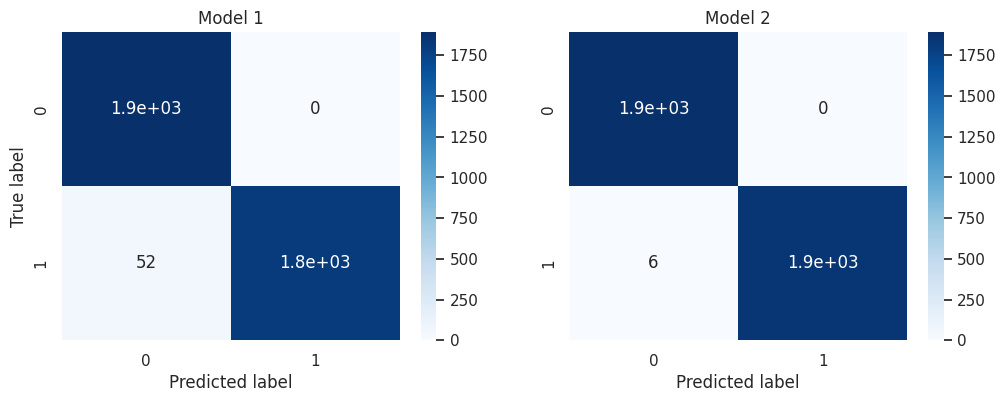

In [ ]:
from sklearn.metrics import confusion_matrix # Importing the confusion_matrix function

y_pred_svm1 = svm1.predict(X_test_bc)
y_pred_svm2 = svm2.predict(X_test_bc)

conf_matrix_model1 = confusion_matrix(y_test_bc, y_pred_svm1)
conf_matrix_model2 = confusion_matrix(y_test_bc, y_pred_svm2)

fig, axs = plt.subplots(1, 2, figsize = (12, 4))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0])
axs[0].set_title('Model 1')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1])
axs[1].set_title('Model 2')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')
plt.show()

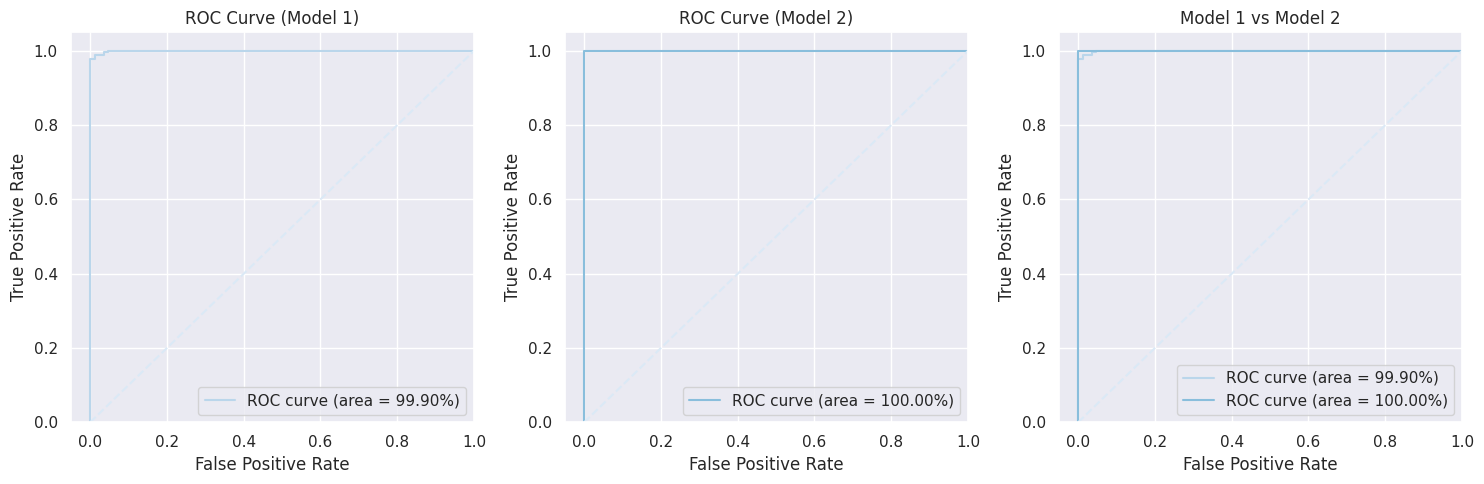

In [ ]:
y_prob_svm1 = svm1.predict_proba(X_test_bc)[:,1]
y_prob_svm2 = svm2.predict_proba(X_test_bc)[:,1]
from sklearn.metrics import roc_curve, auc # Importing roc_curve and auc
# ... rest of the code ...v
fpr1, tpr1, _ = roc_curve(y_test_bc, y_prob_svm1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test_bc, y_prob_svm2)
roc_auc2 = auc(fpr2, tpr2)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))

axes[0].plot(fpr1, tpr1, label = f'ROC curve (area = {roc_auc1:.2%})', color = colors[1])
axes[0].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[0].set_xlim([-0.05, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve (Model 1)')
axes[0].legend(loc = 'lower right')

axes[1].plot(fpr2, tpr2, label = f'ROC curve (area = {roc_auc2:.2%})', color = colors[2])
axes[1].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[1].set_xlim([-0.05, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve (Model 2)')
axes[1].legend(loc = 'lower right')

axes[2].plot(fpr1, tpr1, label = f'ROC curve (area = {roc_auc1:.2%})', color = colors[1])
axes[2].plot(fpr2, tpr2, label = f'ROC curve (area = {roc_auc2:.2%})', color = colors[2])
axes[2].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[2].set_xlim([-0.05, 1.0])
axes[2].set_ylim([0.0, 1.05])
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_title('Model 1 vs Model 2')
axes[2].legend(loc = 'lower right')

plt.tight_layout()
plt.show()


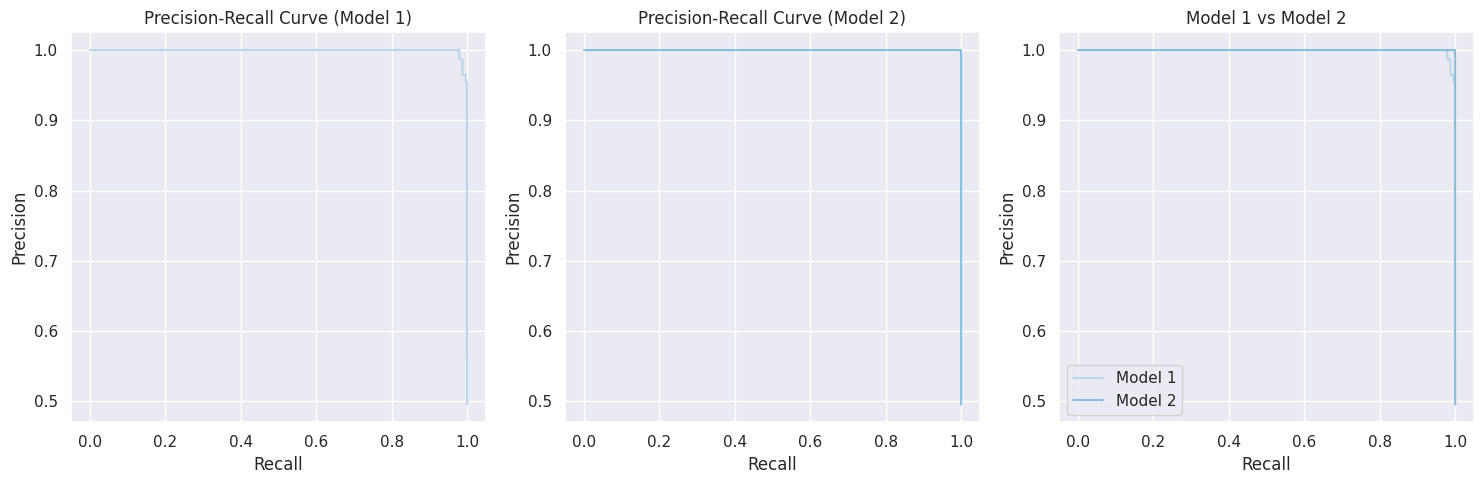

In [ ]:
from sklearn.metrics import precision_recall_curve # Importing the function

precision1, recall1, threshold1 = precision_recall_curve(y_test_bc, y_prob_svm1)
precision2, recall2, threshold2 = precision_recall_curve(y_test_bc, y_prob_svm2)

fig, axs = plt.subplots(1, 3, figsize = (15, 5))

axs[0].plot(recall1, precision1, color = colors[1])
axs[0].set_xlabel('Recall')
axs[0].set_ylabel('Precision')
axs[0].set_title('Precision-Recall Curve (Model 1)')

axs[1].plot(recall2, precision2, color = colors[2])
axs[1].set_xlabel('Recall')
axs[1].set_ylabel('Precision')
axs[1].set_title('Precision-Recall Curve (Model 2)')

axs[2].plot(recall1, precision1, color = colors[1], label = 'Model 1')
axs[2].plot(recall2, precision2, color = colors[2], label = 'Model 2')
axs[2].set_xlabel('Recall')
axs[2].set_ylabel('Precision')
axs[2].set_title('Model 1 vs Model 2')
axs[2].legend(loc = 'lower left')

plt.tight_layout()
plt.show()

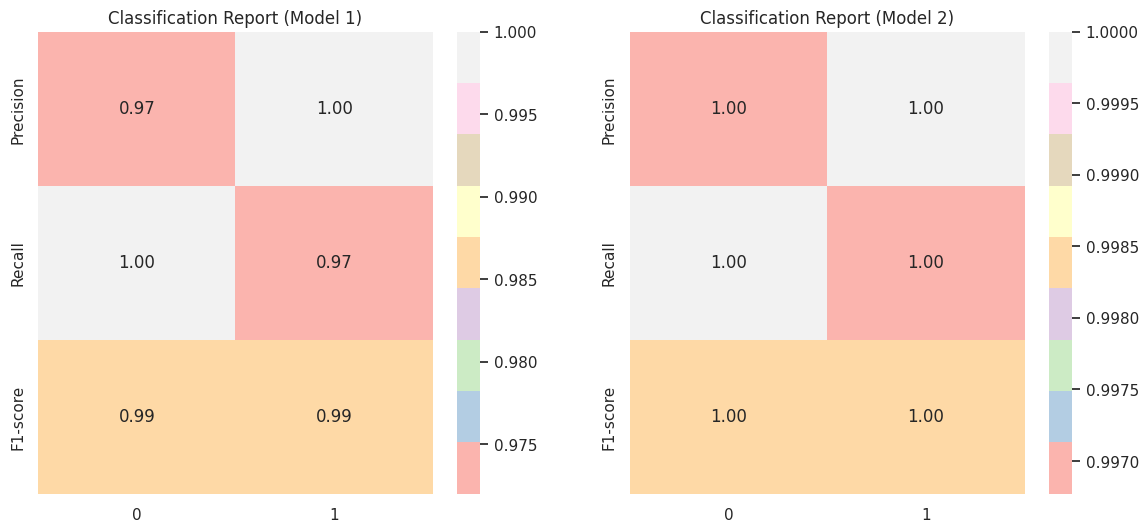

In [ ]:
from sklearn.metrics import classification_report # Importing the classification_report function

target_names = svm1.classes_
metrics1 = classification_report(y_true = y_test_bc, y_pred = y_pred_svm1, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test_bc, y_pred = y_pred_svm2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(data1, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
axs[0].set_title('Classification Report (Model 1)')
axs[1].set_title('Classification Report (Model 2)')
plt.show()

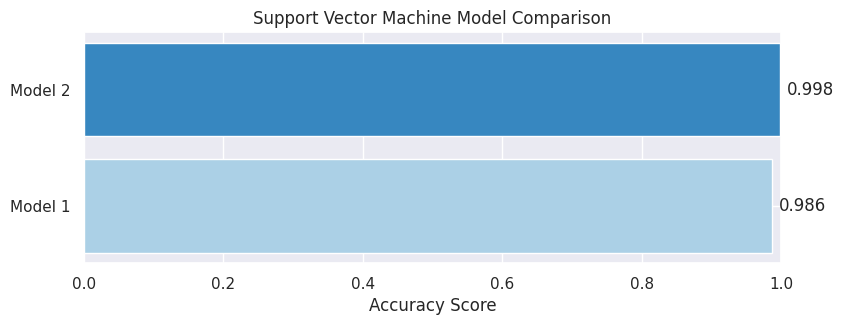

In [ ]:
palette = sns.color_palette('Blues', n_colors = 2)

# Importing accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

acc1 = accuracy_score(y_pred_svm1, y_test_bc)
acc2 = accuracy_score(y_pred_svm2, y_test_bc)

labels = ['Model 1', 'Model 2']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Support Vector Machine Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

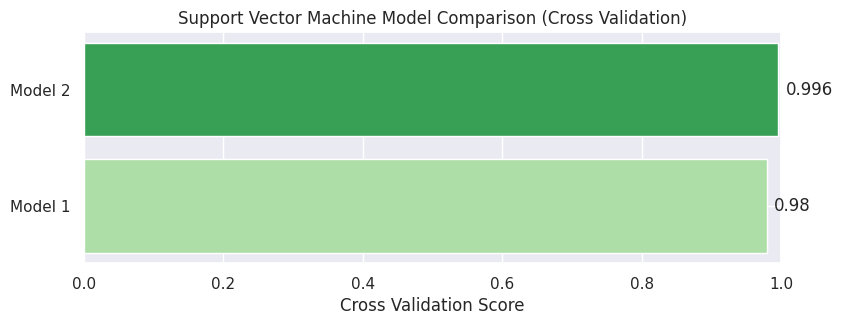

In [ ]:
palette = sns.color_palette('Greens', n_colors = 2)

labels = ['Model 1', 'Model 2']
scores = [cv_svm1.mean(), cv_svm2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Support Vector Machine Model Comparison (Cross Validation)')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

## Random Forest Models Comparison

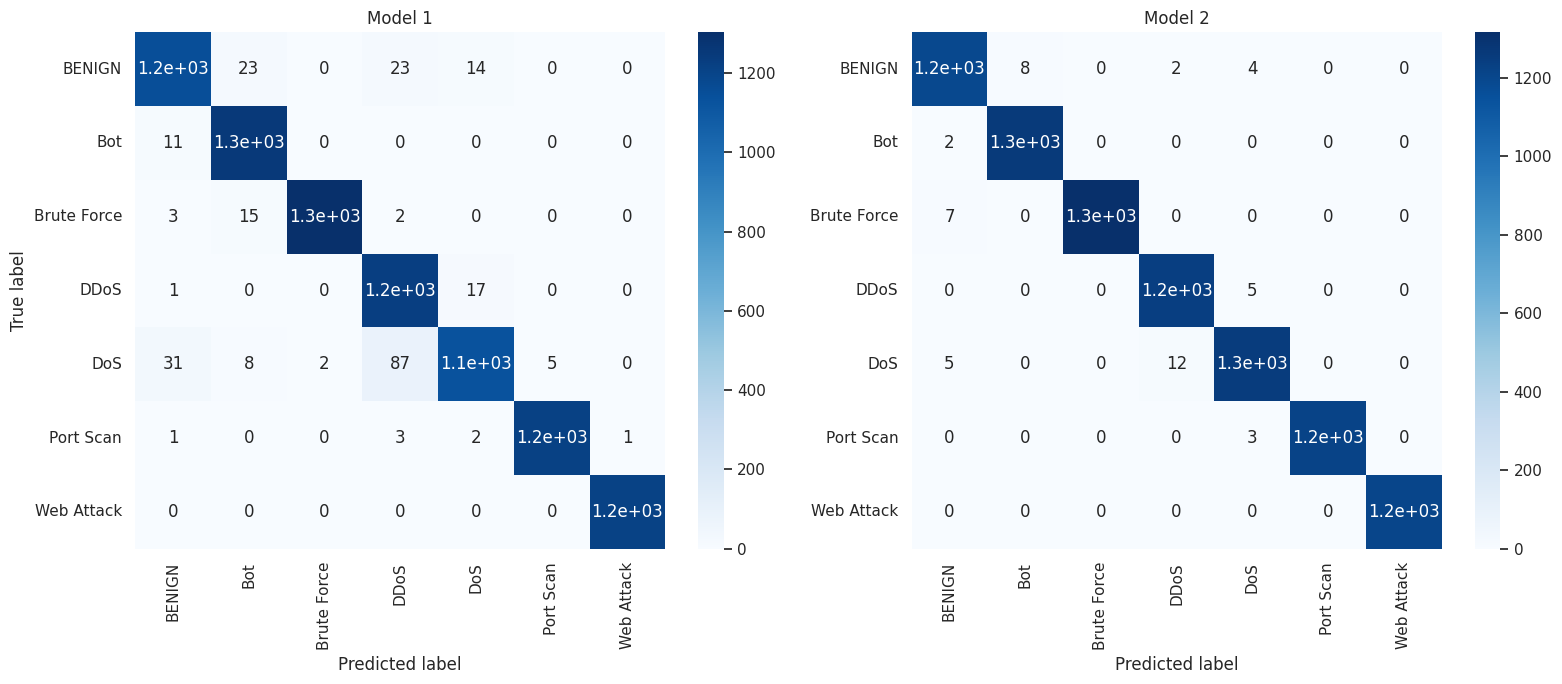

In [ ]:
y_pred_rf1 = rf1.predict(X_test)
y_pred_rf2 = rf2.predict(X_test)

conf_matrix_model1 = confusion_matrix(y_test, y_pred_rf1)
conf_matrix_model2 = confusion_matrix(y_test, y_pred_rf2)

fig, axs = plt.subplots(1, 2, figsize = (16, 7))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0], xticklabels = rf1.classes_, yticklabels = rf1.classes_)
axs[0].set_title('Model 1')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1], xticklabels = rf2.classes_, yticklabels = rf2.classes_)
axs[1].set_title('Model 2')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')

fig.tight_layout()
plt.show()

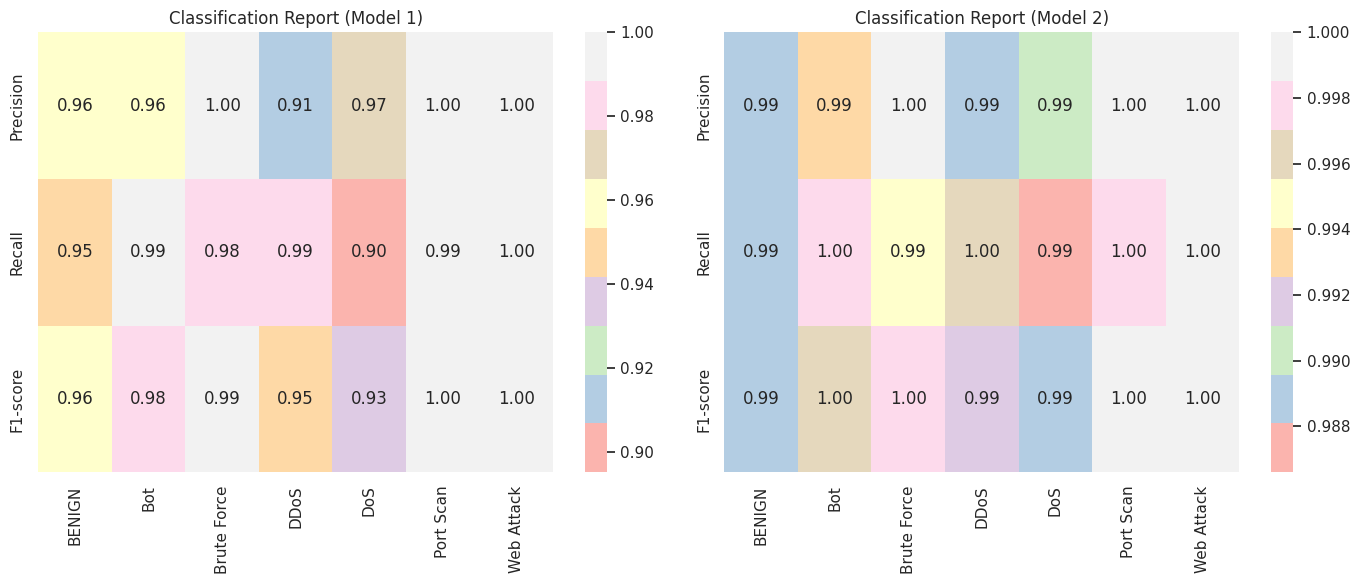

In [ ]:
target_names = rf1.classes_
metrics1 = classification_report(y_true = y_test, y_pred = y_pred_rf1, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test, y_pred = y_pred_rf2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize = (14, 6))
sns.heatmap(data1, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
axs[0].set_title('Classification Report (Model 1)')
axs[1].set_title('Classification Report (Model 2)')
fig.tight_layout()
plt.show()

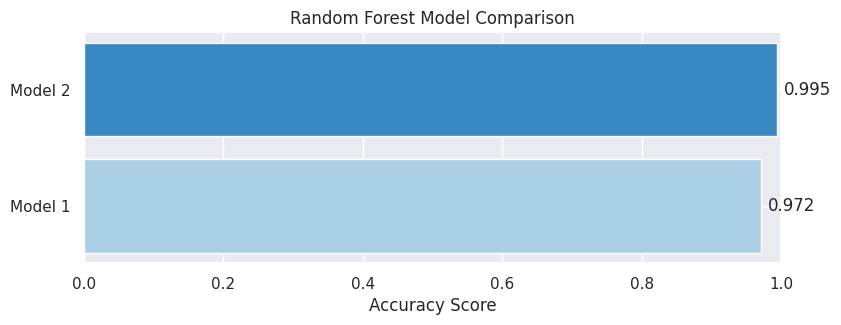

In [ ]:
palette = sns.color_palette('Blues', n_colors = 2)

acc1 = accuracy_score(y_pred_rf1, y_test)
acc2 = accuracy_score(y_pred_rf2, y_test)

labels = ['Model 1', 'Model 2']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Random Forest Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

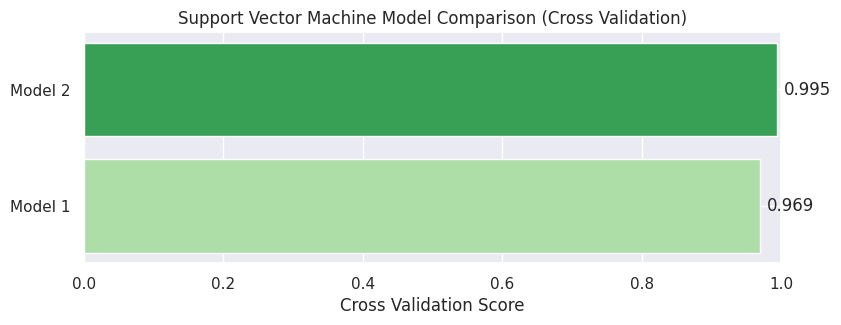

In [ ]:

palette = sns.color_palette('Greens', n_colors = 2)

labels = ['Model 1', 'Model 2']
scores = [cv_rf1.mean(), cv_rf2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Support Vector Machine Model Comparison (Cross Validation)')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()